# Weather (Multivariate Time Series) Analysis & Forecasting with ARIMA, SARIMA, Prophet, RNN, LSTM, GRU Models
---

## Data Preparation

### **About Dataset:**

The Dataset is fully dedicated for the developers who want to train the model on Weather Forecasting for Indian climate. This dataset provides data from 1st January 2013 to 24th April 2017 in the city of Delhi, India.

The 4 parameters here are:

- meantemp
- humidity
- wind_speed
- meanpressure

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

import plotly.express as px
import plotly.graph_objects as go
import cufflinks as cf

import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

# Set default figure size for matplotlib
plt.rcParams["figure.figsize"] = (10, 6)

# Set Seaborn style
sns.set_style("whitegrid")

# Set pandas display options
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_columns', None)  # Display all columns in the dataframe

# Uncomment the line below if you want to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

### Read Data

In [3]:
# Install Kaggle package
!pip install -q kaggle

# Create the Kaggle directory if it doesn't exist
import os

kaggle_dir = os.path.expanduser('~/.kaggle')
if not os.path.exists(kaggle_dir):
    os.makedirs(kaggle_dir)

# Copy the kaggle.json file into the Kaggle directory
!cp kaggle.json ~/.kaggle/

# Set permissions for the kaggle.json file
!chmod 600 ~/.kaggle/kaggle.json

# Download the dataset from Kaggle
!kaggle datasets download -d sumanthvrao/daily-climate-time-series-data

# Unzip the downloaded dataset
!unzip -q '/content/daily-climate-time-series-data.zip' -d '/content/dataset/'

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/sumanthvrao/daily-climate-time-series-data
License(s): CC0-1.0
  0% 0.00/22.0k [00:00<?, ?B/s]
100% 22.0k/22.0k [00:00<00:00, 39.0MB/s]


In [4]:
# Path to the dataset
file_path = '/content/dataset/DailyDelhiClimateTrain.csv'


# Read the CSV file, parse 'date' column as datetime, and set it as index
df = pd.read_csv(file_path,
                parse_dates=['date'],  # Convert 'date' column to datetime
                index_col='date')      # Set 'date' column as index

# Display the dataframe
df

meantemp  humidity  wind_speed  meanpressure
date                                                    
2013-01-01    10.000    84.500       0.000      1015.667
2013-01-02     7.400    92.000       2.980      1017.800
2013-01-03     7.167    87.000       4.633      1018.667
2013-01-04     8.667    71.333       1.233      1017.167
2013-01-05     6.000    86.833       3.700      1016.500
...              ...       ...         ...           ...
2016-12-28    17.217    68.043       3.548      1015.565
2016-12-29    15.238    87.857       6.000      1016.905
2016-12-30    14.095    89.667       6.267      1017.905
2016-12-31    15.053    87.000       7.325      1016.100
2017-01-01    10.000   100.000       0.000      1016.000

[1462 rows x 4 columns]

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1462 entries, 2013-01-01 to 2017-01-01
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   meantemp      1462 non-null   float64
 1   humidity      1462 non-null   float64
 2   wind_speed    1462 non-null   float64
 3   meanpressure  1462 non-null   float64
dtypes: float64(4)
memory usage: 57.1 KB
None


In [6]:
# Display descriptive statistics of the dataframe, transposed for better readability
print(df.describe().T)

                count     mean     std    min      25%      50%      75%  \
meantemp     1462.000   25.496   7.348  6.000   18.857   27.714   31.306   
humidity     1462.000   60.772  16.770 13.429   50.375   62.625   72.219   
wind_speed   1462.000    6.802   4.562  0.000    3.475    6.222    9.238   
meanpressure 1462.000 1011.105 180.232 -3.042 1001.580 1008.563 1014.945   

                  max  
meantemp       38.714  
humidity      100.000  
wind_speed     42.220  
meanpressure 7679.333  


In [7]:
print(df.head())

            meantemp  humidity  wind_speed  meanpressure
date                                                    
2013-01-01    10.000    84.500       0.000      1015.667
2013-01-02     7.400    92.000       2.980      1017.800
2013-01-03     7.167    87.000       4.633      1018.667
2013-01-04     8.667    71.333       1.233      1017.167
2013-01-05     6.000    86.833       3.700      1016.500


In [8]:
# Create new features based on the datetime index
df['year'] = df.index.year
df['month'] = df.index.month
df['day'] = df.index.day
df['dayofweek'] = df.index.dayofweek
df['date'] = df.index.date

In [9]:
# Display the first few rows of the dataframe with new features
print(df.head())

            meantemp  humidity  wind_speed  meanpressure  year  month  day  \
date                                                                         
2013-01-01    10.000    84.500       0.000      1015.667  2013      1    1   
2013-01-02     7.400    92.000       2.980      1017.800  2013      1    2   
2013-01-03     7.167    87.000       4.633      1018.667  2013      1    3   
2013-01-04     8.667    71.333       1.233      1017.167  2013      1    4   
2013-01-05     6.000    86.833       3.700      1016.500  2013      1    5   

            dayofweek        date  
date                               
2013-01-01          1  2013-01-01  
2013-01-02          2  2013-01-02  
2013-01-03          3  2013-01-03  
2013-01-04          4  2013-01-04  
2013-01-05          5  2013-01-05  


In [10]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1462 entries, 2013-01-01 to 2017-01-01
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   meantemp      1462 non-null   float64
 1   humidity      1462 non-null   float64
 2   wind_speed    1462 non-null   float64
 3   meanpressure  1462 non-null   float64
 4   year          1462 non-null   int32  
 5   month         1462 non-null   int32  
 6   day           1462 non-null   int32  
 7   dayofweek     1462 non-null   int32  
 8   date          1462 non-null   object 
dtypes: float64(4), int32(4), object(1)
memory usage: 91.4+ KB
None


## Exploratory Data Analysis and Visualizations

### Plotting features over time (daily)

In [11]:
import plotly.express as px

# Plotting features over time (daily)
fig_meantemp = px.line(df, x=df.index, y='meantemp', title='Mean Temperature Over Time')
fig_meantemp.update_layout(
    plot_bgcolor='rgb(35, 35, 35)',     # Dark gray plot background
    paper_bgcolor='rgb(25, 25, 25)',     # Very dark gray background
    font=dict(color='lightgray'),       # Light gray font color
    title_x=0.5,                         # Title center alignment
    xaxis_title="Date"                  # X-axis title
)
fig_meantemp.show()

In [12]:
fig_humidity = px.line(df, x=df.index, y='humidity', title='Humidity Over Time')
fig_humidity.update_layout(
    plot_bgcolor='rgb(35, 35, 35)',     # Dark gray plot background
    paper_bgcolor='rgb(25, 25, 25)',     # Very dark gray background
    font=dict(color='lightgray'),       # Light gray font color
    title_x=0.5,                         # Title center alignment
    xaxis_title="Date"                  # X-axis title
)
fig_humidity.show()

In [13]:
fig_wind_speed = px.line(df, x=df.index, y='wind_speed', title='Wind Speed Over Time')
fig_wind_speed.update_layout(
    plot_bgcolor='rgb(35, 35, 35)',     # Dark gray plot background
    paper_bgcolor='rgb(25, 25, 25)',     # Very dark gray background
    font=dict(color='lightgray'),       # Light gray font color
    title_x=0.5,                         # Title center alignment
    xaxis_title="Date"                  # X-axis title
)
fig_wind_speed.show()

In [14]:
fig_meanpressure = px.line(df, x=df.index, y='meanpressure', title='Mean Pressure Over Time')
fig_meanpressure.update_layout(
    plot_bgcolor='rgb(35, 35, 35)',     # Dark gray plot background
    paper_bgcolor='rgb(25, 25, 25)',     # Very dark gray background
    font=dict(color='lightgray'),       # Light gray font color
    title_x=0.5,                         # Title center alignment
    xaxis_title="Date"                  # X-axis title
)
fig_meanpressure.show()

### Plotting Seasonal Decompositions with plotly

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose
import plotly.graph_objects as go
import plotly.subplots as sp

# Perform seasonal decomposition
result = seasonal_decompose(df['meantemp'], model='additive', period=365)

# Plot the decomposed components
fig = sp.make_subplots(rows=4, cols=1, shared_xaxes=True,
                       subplot_titles=['Observed', 'Trend', 'Seasonal', 'Residual'])

# Add traces for each component
fig.add_trace(go.Scatter(x=df.index, y=result.observed, mode='lines', name='Observed'), row=1, col=1)
fig.add_trace(go.Scatter(x=df.index, y=result.trend, mode='lines', name='Trend'), row=2, col=1)
fig.add_trace(go.Scatter(x=df.index, y=result.seasonal, mode='lines', name='Seasonal'), row=3, col=1)
fig.add_trace(go.Scatter(x=df.index, y=result.resid, mode='lines', name='Residual'), row=4, col=1)

# Customize layout
fig.update_layout(
    plot_bgcolor='rgb(35, 35, 35)',    # Dark gray plot background
    paper_bgcolor='rgb(25, 25, 25)',    # Very dark gray background
    font=dict(color='lightgray'),      # Light gray font color
    height=1000,                         # Set figure height
    title='Seasonal Decomposition of Mean Temperature'  # Figure title
)

# Update subplot titles
for i in range(1, 5):
    fig.update_yaxes(title_text=result.observed.name if i == 1 else '', row=i, col=1)

fig.show()


### Alternative Seasonal Decomposition plot

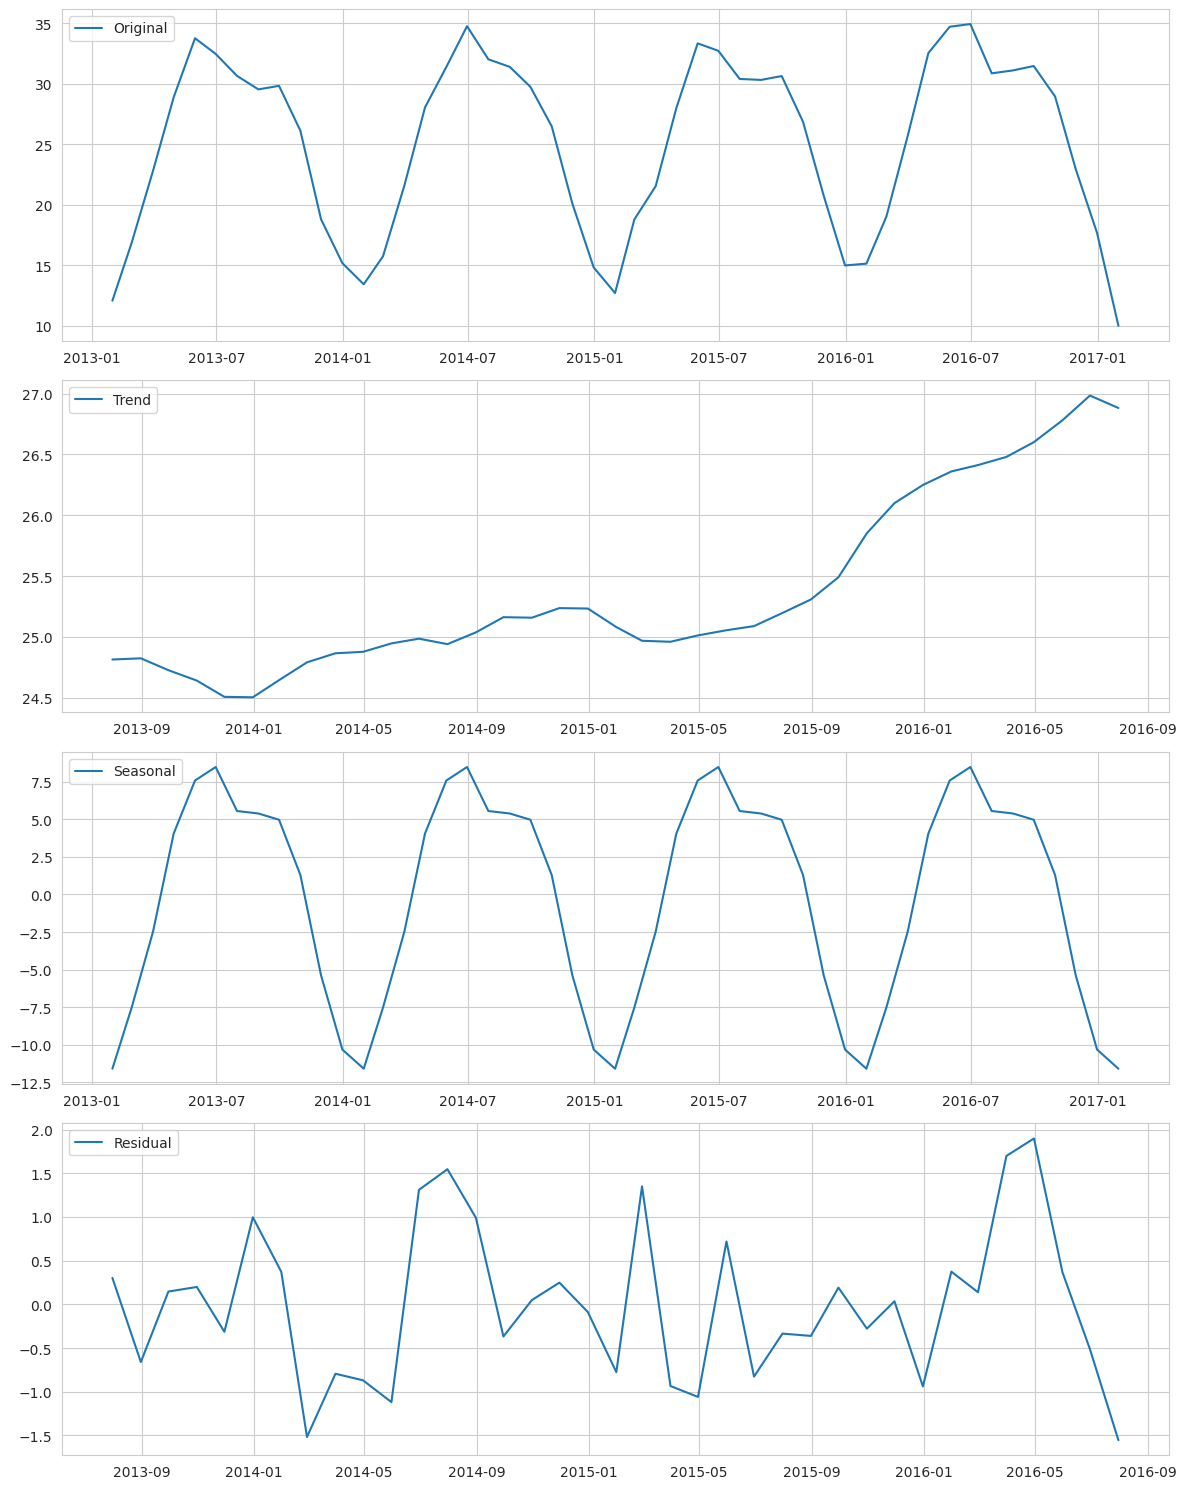

In [16]:
import statsmodels.api as sm

plt.rcParams['figure.figsize'] = [12, 15]

# Select the 'meantemp' column and resample it to monthly frequency
data_monthly = df['meantemp'].resample('M').mean()

# Perform seasonal decomposition for 'meantemp' feature
decomposition = sm.tsa.seasonal_decompose(data_monthly)

# Extract components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot the decomposition components
plt.figure()
plt.subplot(411)
plt.plot(data_monthly, label='Original')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal, label='Seasonal')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual, label='Residual')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

### Plotting Features over time (Month)

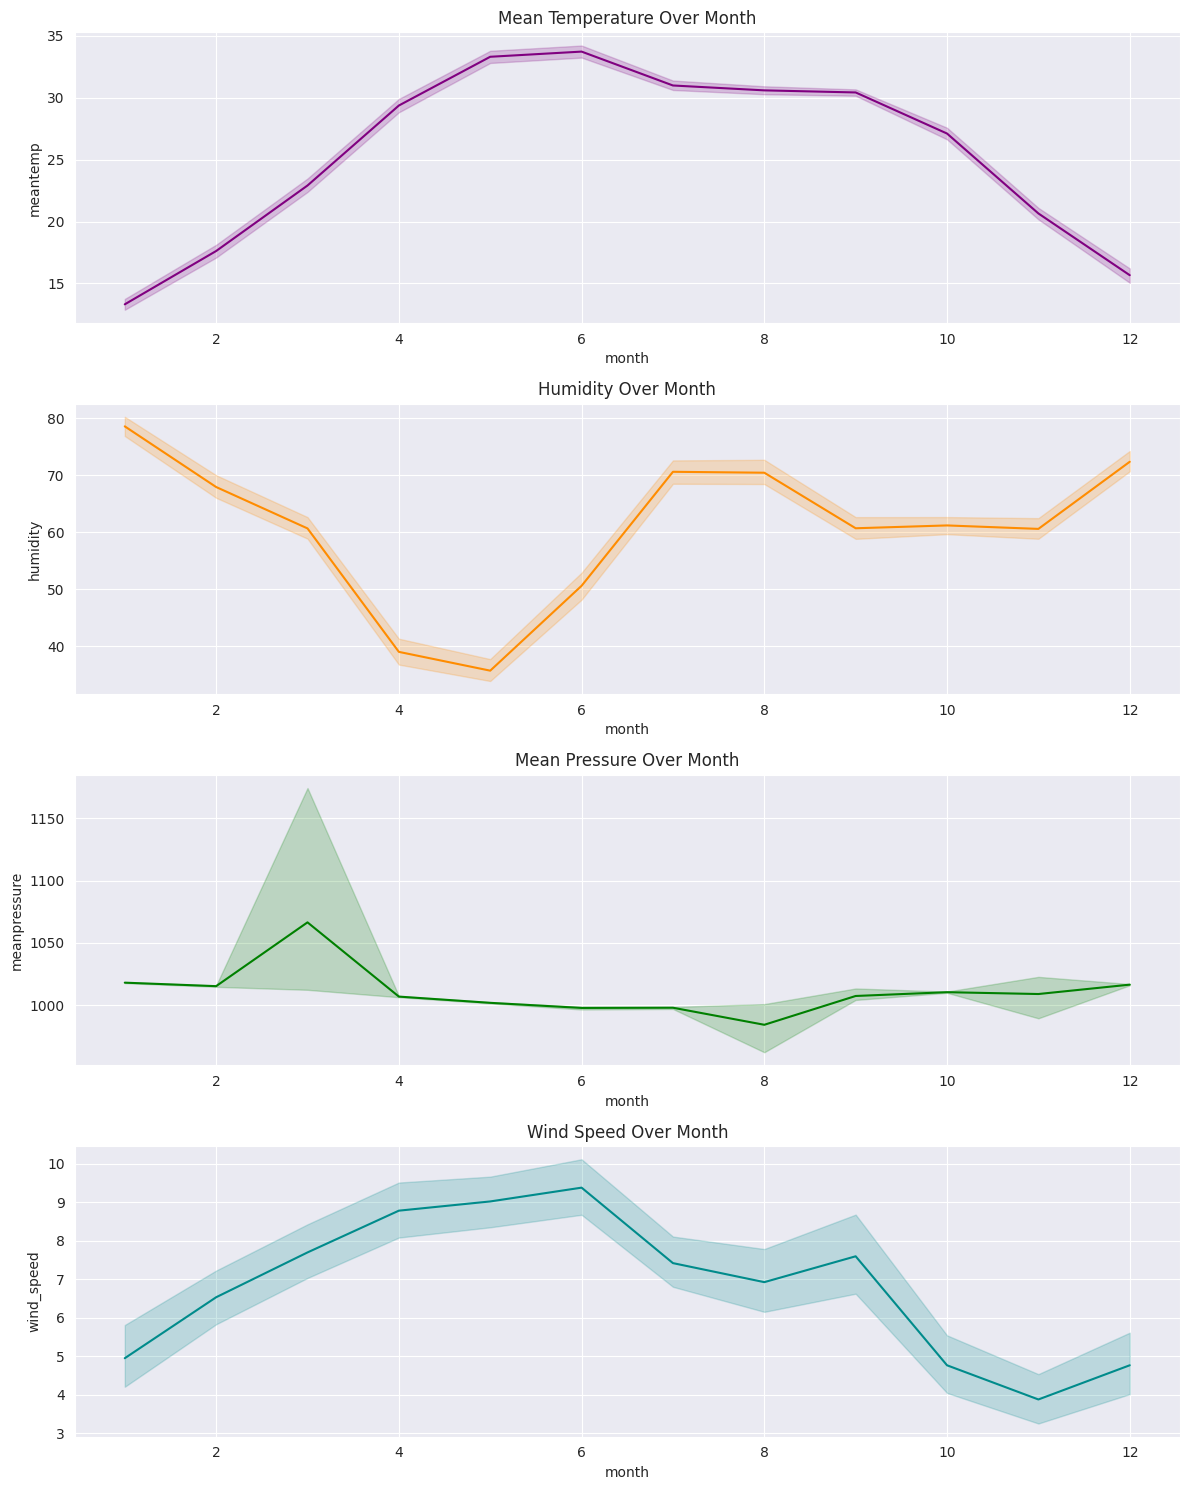

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set figure size and style
plt.figure(figsize=(12, 15))
sns.set_style('darkgrid')

# Plotting features over time (month)
plt.subplot(4, 1, 1)
sns.lineplot(x='month', y='meantemp', data=df, color='purple')
plt.title('Mean Temperature Over Month')

plt.subplot(4, 1, 2)
sns.lineplot(x='month', y='humidity', data=df, color='darkorange')
plt.title('Humidity Over Month')

plt.subplot(4, 1, 3)
sns.lineplot(x='month', y='meanpressure', data=df, color='green')
plt.title('Mean Pressure Over Month')

plt.subplot(4, 1, 4)
sns.lineplot(x='month', y='wind_speed', data=df, color='darkcyan')
plt.title('Wind Speed Over Month')

# Adjust layout
plt.tight_layout()
plt.show()


### Plotting temprature over the years (by month)

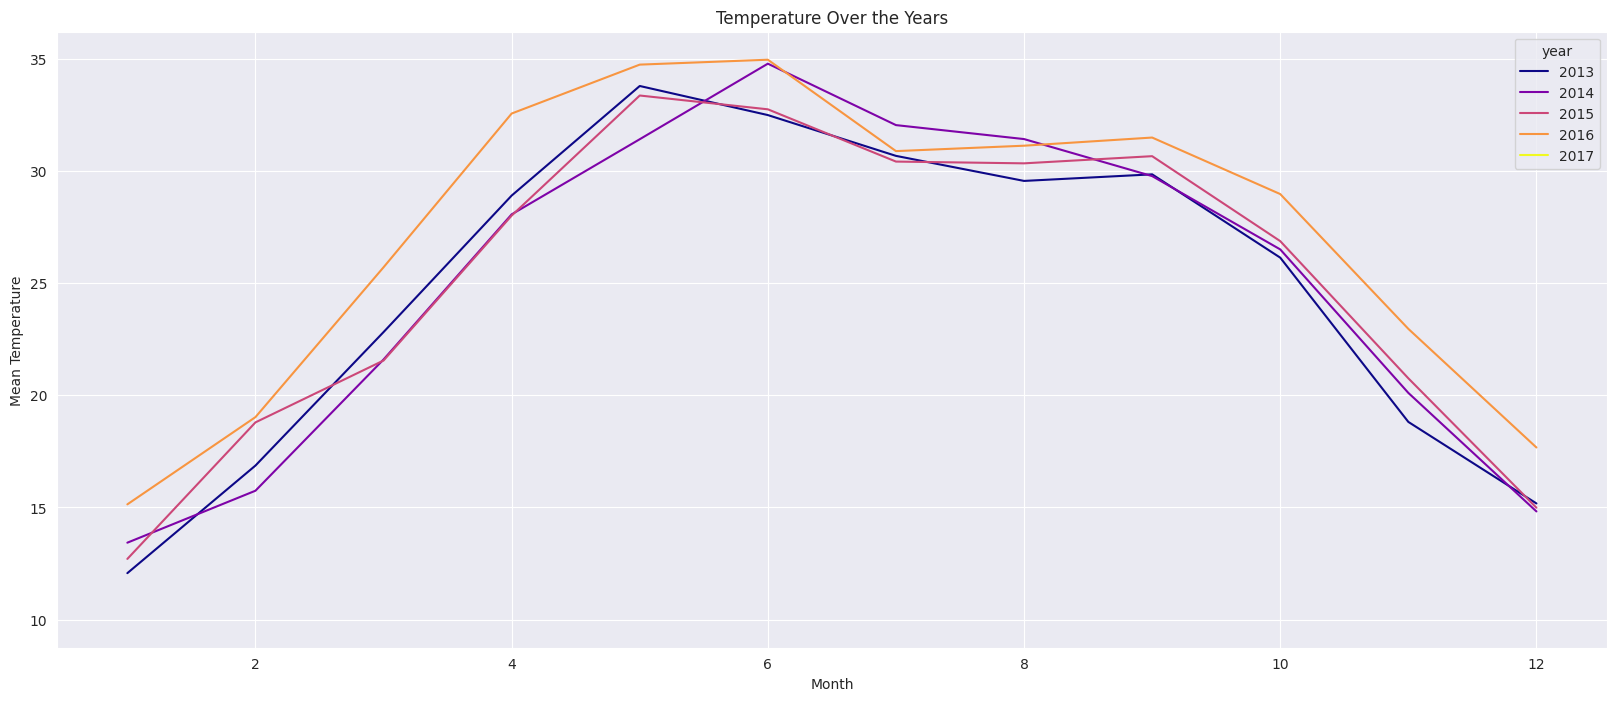

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set figure size and style
plt.figure(figsize=(20, 8))
sns.set_style('darkgrid')

# Plot temperature over the years by month
plt.title("Temperature Over the Years")
sns.lineplot(data=df, x='month', y='meantemp', hue='year', palette='plasma', ci=None)

# Add labels
plt.xlabel("Month")
plt.ylabel("Mean Temperature")

# Show plot
plt.show()


### Monthly Average (Temprature, Pressure, Humidity, Wind Speed) Heatmap with Annotations for each year

In [19]:
import plotly.graph_objects as go

def create_heatmap_trace(data, feature):
    data_filled = data.fillna(method='ffill')  # Forward fill missing values
    heatmap_data = data_filled.pivot_table(values=feature, index='year', columns='month', aggfunc='mean')
    heatmap_text = heatmap_data.round(2).astype(str).values

    heatmap = go.Heatmap(
        z=heatmap_data.values,
        x=heatmap_data.columns,
        y=heatmap_data.index,
        colorscale='thermal',
        text=heatmap_text,
        hoverinfo='text'
    )

    annotations = []
    for i in range(len(heatmap_data.index)):
        for j in range(len(heatmap_data.columns)):
            annotations.append(
                go.layout.Annotation(
                    x=heatmap_data.columns[j],
                    y=heatmap_data.index[i],
                    text=heatmap_text[i][j],
                    showarrow=False,
                    font=dict(color='white' if heatmap_data.values[i, j] < (heatmap_data.values.max() / 2) else 'black')
                )
            )

    return heatmap, annotations

In [20]:
# Create heatmap traces and annotations for each feature
features = ['meantemp', 'meanpressure', 'humidity', 'wind_speed']
titles = ['Monthly Average Temperature', 'Monthly Average Pressure', 'Monthly Average Humidity', 'Monthly Average Wind Speed']

# Create empty lists to store heatmap traces and annotations
heatmap_traces = []
annotations_list = []

# Iterate over each feature to create heatmap traces and annotations
for feature, title in zip(features, titles):
    heatmap, annotations = create_heatmap_trace(df, feature)
    heatmap_traces.append(heatmap)
    annotations_list.append(annotations)


In [21]:
# Initialize figure with all traces but only show the first one
fig = go.Figure(data=heatmap_traces)

# Set initial visibility
for i, trace in enumerate(fig.data):
    trace.visible = (i == 0)

# Set layout properties
fig.update_layout(
    title=titles[0],
    xaxis=dict(nticks=12, title='Month'),
    yaxis=dict(title='Year'),
    annotations=annotations_list[0],
    updatemenus=[
        dict(
            buttons=[
                dict(
                    args=[{'visible': [j == i for j in range(len(features))]},
                          {'annotations': annotations_list[i],
                           'title': titles[i]}],
                    label=titles[i],
                    method='update'
                )
                for i in range(len(features))
            ],
            direction='down',
            showactive=True,
            x=1.15,  # Positioning the button to the right
            y=1.15   # Positioning the button at the top
        )
    ]
)

fig.show()

### Heatmap with seaborn

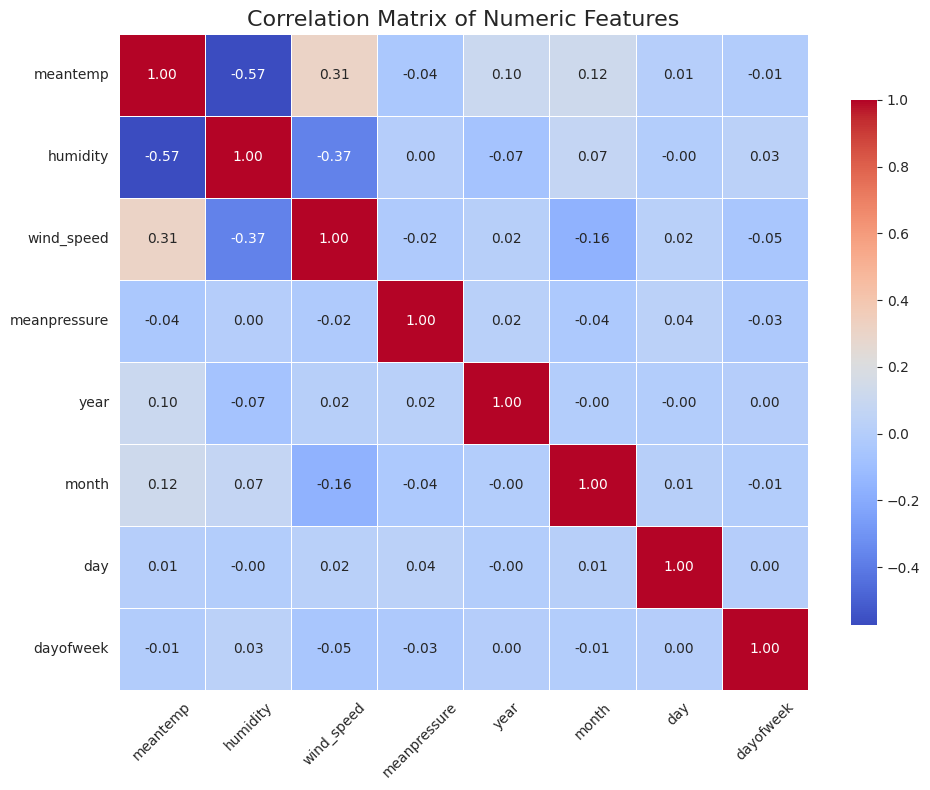

In [22]:
# Set up the figure size
plt.figure(figsize=(10, 8))

# Compute the correlation matrix for numeric columns
correlation_matrix = df.select_dtypes('number').corr()

# Customize the heatmap
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt='.2f',
            linewidths=0.5, annot_kws={"size": 10}, cbar_kws={"shrink": 0.8})

# Add title
plt.title('Correlation Matrix of Numeric Features', fontsize=16)

# Adjust tick labels rotation for better readability
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Show plot
plt.tight_layout()
plt.show()


### Correlation Barplot with meantemp feature

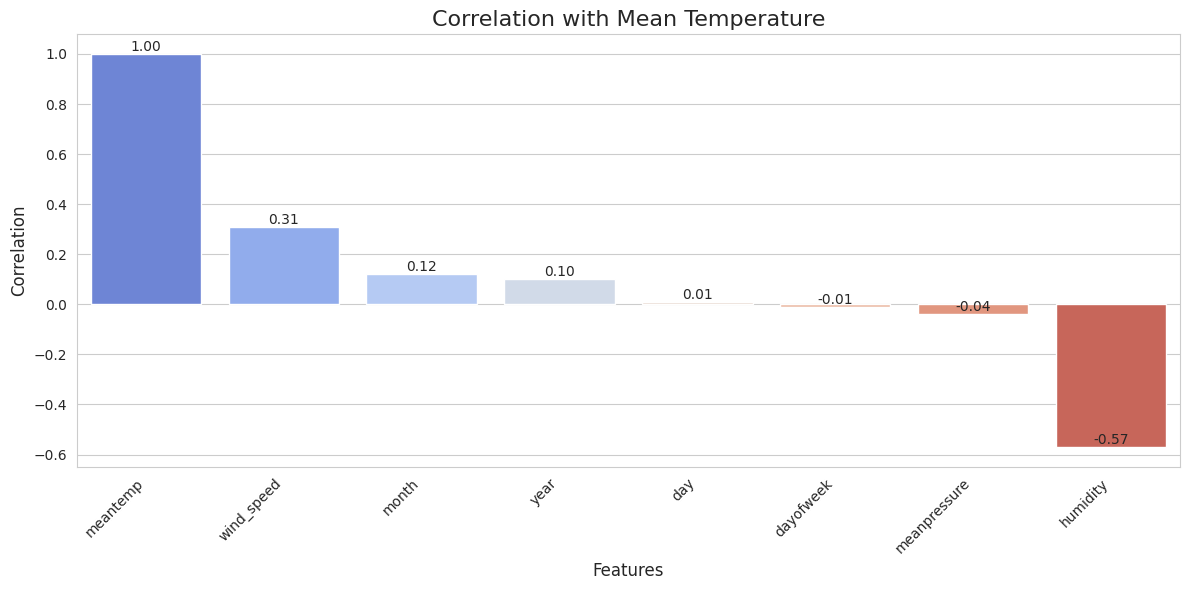

In [23]:
# Set up the figure size and style
plt.figure(figsize=(12, 6))
sns.set_style('whitegrid')

# Compute the correlation matrix for numeric columns
correlation_matrix = round(df.select_dtypes('number').corr(), 2)

# Sort correlations with meantemp in descending order
correlation_with_trgt = correlation_matrix['meantemp'].sort_values(ascending=False)

# Create the bar plot
ax = sns.barplot(x=correlation_with_trgt.index, y=correlation_with_trgt, palette='coolwarm')

# Title and axis labels
plt.title('Correlation with Mean Temperature', size=16)
plt.xlabel('Features', size=12)
plt.ylabel('Correlation', size=12)

# Add value annotations on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=10)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show plot
plt.tight_layout()
plt.show()


### Monthly Distributions of features with Box Plots

In [24]:
import plotly.express as px

# Create subplots for each feature
fig = px.box(df, x='month', y='meantemp', title='Monthly Distribution of Mean Temperatures', template='plotly_dark')
fig.update_xaxes(title_text='Month')
fig.update_yaxes(title_text='Mean Temperature')

fig2 = px.box(df, x='month', y='humidity', title='Monthly Distribution of Mean Humidity', template='plotly_dark')
fig2.update_xaxes(title_text='Month')
fig2.update_yaxes(title_text='Mean Humidity')

fig3 = px.box(df, x='month', y='wind_speed', title='Monthly Distribution of Mean Wind Speed', template='plotly_dark')
fig3.update_xaxes(title_text='Month')
fig3.update_yaxes(title_text='Mean Wind Speed')

fig4 = px.box(df, x='month', y='meanpressure', title='Monthly Distribution of Mean Pressure', template='plotly_dark')
fig4.update_xaxes(title_text='Month')
fig4.update_yaxes(title_text='Mean Pressure')

# Arrange subplots in a grid
fig.update_layout(
    grid={'rows': 2, 'columns': 2, 'pattern': "independent"},
)

# Show plots
fig.show()
fig2.show()
fig3.show()
fig4.show()



### Scatterplots

In [25]:
import plotly.express as px

# Create scatter matrix plot
fig = px.scatter_matrix(df,
                        dimensions=['meantemp', 'humidity', 'wind_speed', 'meanpressure'],
                        title='Scatter Matrix of Weather Parameters')

# Update layout to increase figure size and add outlines to dots
fig.update_layout(
    width=1500,  # Increased width of the figure
    height=1000,  # Increased height of the figure
    title_x=0.5,  # Title position
    margin=dict(l=50, r=50, t=50, b=50),  # Margin around the plot
    template='plotly_dark'
)

# Update marker properties to add outlines
fig.update_traces(marker=dict(line=dict(width=1, color='black')))  # Add outlines to dots

# Show the figure
fig.show()


### Histograms

In [26]:
import plotly.graph_objects as go
import plotly.express as px

# Create individual histogram plots with KDE lines and outlines for each feature
fig_meantemp = px.histogram(df, x='meantemp', marginal='rug', title='Histogram Mean Temperature')
fig_humidity = px.histogram(df, x='humidity', marginal='rug', title='Histogram for Humidity')
fig_wind_speed = px.histogram(df, x='wind_speed', marginal='rug', title='Histogram for Wind Speed')

# Update traces to add outlines to the bars
for fig in [fig_meantemp, fig_humidity, fig_wind_speed]:
    fig.update_traces(marker=dict(line=dict(width=1, color='black')))  # Add outlines to bars

# Create subplot layout
fig = go.Figure()

# Add traces to the subplot
fig.add_trace(fig_meantemp['data'][0])  # Add Mean Temperature histogram
fig.add_trace(fig_humidity['data'][0])  # Add Humidity histogram
fig.add_trace(fig_wind_speed['data'][0])  # Add Wind Speed histogram

# Define button list for toggling between plots
buttons = [
    dict(label='Mean Temperature', method='update', args=[{'visible': [True, False, False]}]),
    dict(label='Humidity', method='update', args=[{'visible': [False, True, False]}]),
    dict(label='Wind Speed', method='update', args=[{'visible': [False, False, True]}]),
]

# Add buttons to the figure
fig.update_layout(
    updatemenus=[dict(buttons=buttons, direction='down', showactive=True, x=1.0, y=1.15)],
    title='Histograms with Outlines',
    template='plotly_dark'
)

# Show the figure
fig.show()


### Histograms with Seaborn

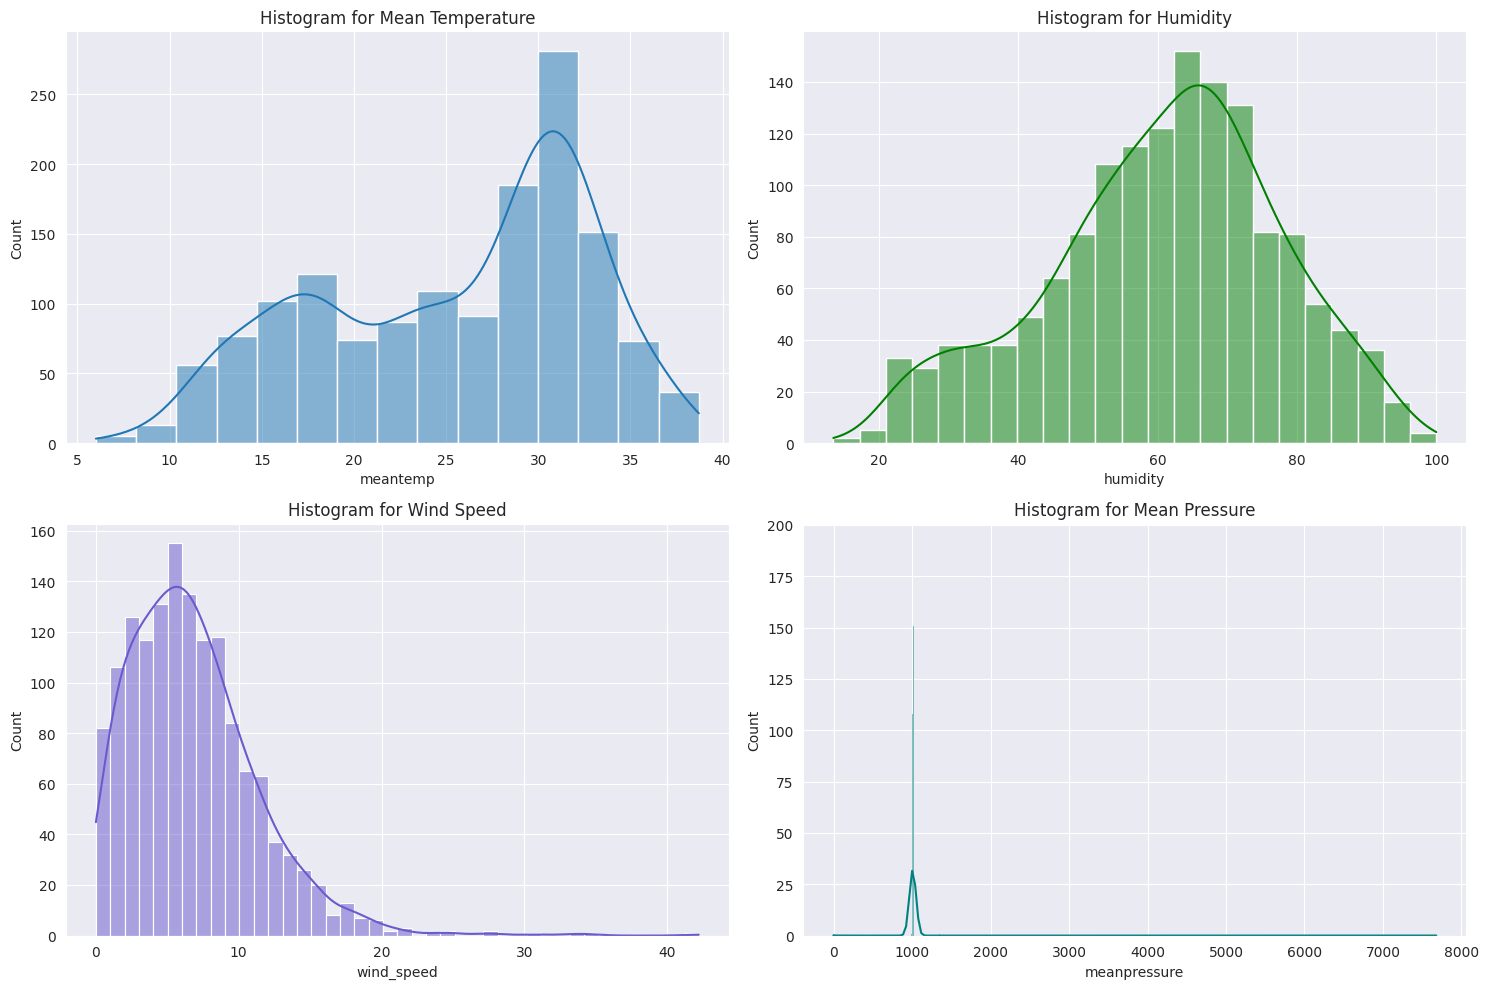

In [27]:
# Reset seaborn style to default
sns.set_style('darkgrid')

# Create subplots
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

# Plot histograms with KDE
sns.histplot(data=df, x="meantemp", ax=ax[0][0], kde=True)
ax[0][0].set_title('Histogram for Mean Temperature')

sns.histplot(data=df, x="humidity", ax=ax[0][1], kde=True, color='green')
ax[0][1].set_title('Histogram for Humidity')

sns.histplot(data=df, x="wind_speed", ax=ax[1][0], kde=True, color='slateblue')
ax[1][0].set_title('Histogram for Wind Speed')

sns.histplot(data=df, x="meanpressure", ax=ax[1][1], kde=True, color='teal')
ax[1][1].set_title('Histogram for Mean Pressure')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


### Polar Plots

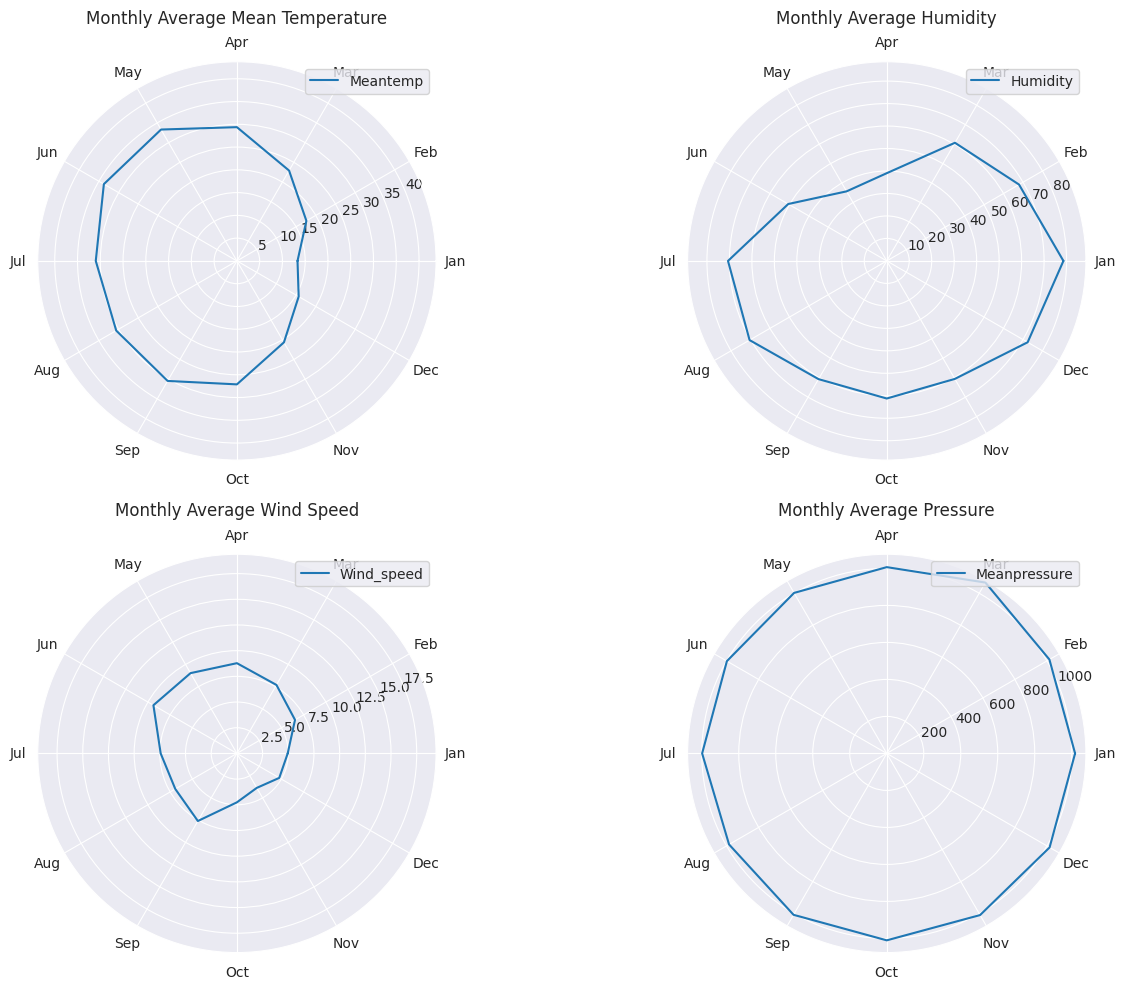

In [28]:
# Reset seaborn style to default
sns.set_style('darkgrid')

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, subplot_kw={'projection': 'polar'}, figsize=(14, 10))

# List of parameters and their titles
parameters = ['meantemp', 'humidity', 'wind_speed', 'meanpressure']
titles = ['Monthly Average Mean Temperature', 'Monthly Average Humidity',
          'Monthly Average Wind Speed', 'Monthly Average Pressure']

for ax, param, title in zip(axs.flatten(), parameters, titles):
    # Grouping the data by month, calculating the average mean value for each month
    monthly_average = df.groupby('month')[param].mean()

    # Polar Plot theta (angle) and radii (length) settings
    theta = np.linspace(0, 2 * np.pi, len(monthly_average), endpoint=False)
    radii = monthly_average.values

    # Extend theta and radii to connect the circle
    theta = np.append(theta, theta[0])
    radii = np.append(radii, radii[0])

    # Polar Plot
    ax.plot(theta, radii, label=param.capitalize())
    ax.set_title(title, va='bottom')
    ax.set_xticks(theta[:-1])
    ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May',
                        'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    ax.set_ylim(0, radii.max() + 10)
    ax.legend(loc='upper right')

plt.tight_layout()
plt.show()


## Feature Selection

> Average pressure (meanpressure) is almost the same in every month and has almost no correlation with meantemp feature

In [29]:
# Selecting the desired features for modeling
df = df[['meantemp', 'humidity', 'wind_speed']]

# Displaying the first few rows of the updated DataFrame
print(df.head())

            meantemp  humidity  wind_speed
date                                      
2013-01-01    10.000    84.500       0.000
2013-01-02     7.400    92.000       2.980
2013-01-03     7.167    87.000       4.633
2013-01-04     8.667    71.333       1.233
2013-01-05     6.000    86.833       3.700


In [30]:
# Display information about the DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1462 entries, 2013-01-01 to 2017-01-01
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   meantemp    1462 non-null   float64
 1   humidity    1462 non-null   float64
 2   wind_speed  1462 non-null   float64
dtypes: float64(3)
memory usage: 45.7 KB
None


## Machine Learning Models

### ARIMA-SARIMA Models

- **ARIMA (Autoregressive Integrated Moving Average)**:
  - Suitable for time series data with non-seasonal patterns.
  - Consists of three main components:
    - Autoregression (AR): Current value of the series depends on its previous values.
    - Integration (I): Differencing the series to make it stationary (i.e., constant mean and variance).
    - Moving Average (MA): Current value of the series depends on the past forecast errors.
  - Parameters:
    - p: Autoregressive order (number of lag observations included in the model).
    - d: Degree of differencing (number of times the series is differenced to achieve stationarity).
    - q: Moving average order (size of the moving average window).

- **SARIMA (Seasonal ARIMA)**:
  - Extends ARIMA by incorporating seasonal components.
  - Suitable for time series data with seasonal patterns.
  - Includes additional parameters for seasonal autoregression, seasonal differencing, and seasonal moving averages.
  - Parameters:
    - P: Seasonal autoregressive order.
    - D: Degree of seasonal differencing.
    - Q: Seasonal moving average order.
    - m: Number of time steps in each seasonal period (e.g., 12 for monthly data with yearly seasonality).

- **SARIMAX (Seasonal ARIMA with exogenous variables)**:
  - Builds upon SARIMA by allowing the inclusion of exogenous variables.
  - Exogenous variables are external factors that influence the time series but are not influenced by it.
  - Helps improve forecasting accuracy by incorporating additional information beyond the time series itself.
  - Allows for modeling complex relationships between the time series and external factors.

In [31]:
# Creating a copy of the DataFrame
df1 = df.copy()

# Displaying the new DataFrame
df1

meantemp  humidity  wind_speed
date                                      
2013-01-01    10.000    84.500       0.000
2013-01-02     7.400    92.000       2.980
2013-01-03     7.167    87.000       4.633
2013-01-04     8.667    71.333       1.233
2013-01-05     6.000    86.833       3.700
...              ...       ...         ...
2016-12-28    17.217    68.043       3.548
2016-12-29    15.238    87.857       6.000
2016-12-30    14.095    89.667       6.267
2016-12-31    15.053    87.000       7.325
2017-01-01    10.000   100.000       0.000

[1462 rows x 3 columns]

#### Check Stationarity



- **ACF (Autocorrelation Function)**:
  - The ACF measures the correlation between a series and its lagged values at different lag distances.
  - It helps identify the presence of autocorrelation, which is the correlation between observations of a time series separated by a certain lag.
  - ACF values closer to 1 or -1 indicate strong positive or negative autocorrelation, respectively, at that lag.
  - In the context of ACF plots:
    - If the ACF values decay exponentially to zero or dampen gradually, it suggests the series is stationary.
    - If the ACF values remain significant for many lags, it indicates non-stationarity.

- **PACF (Partial Autocorrelation Function)**:
  - The PACF measures the correlation between a series and its lagged values while controlling for the effects of other lags.
  - It helps identify the direct relationship between observations at different lags.
  - PACF values that are significantly different from zero indicate a direct effect between the observations at those lags.
  - In the context of PACF plots:
    - Sharp cutoffs after a certain lag suggest that lags beyond that point are not directly correlated with the current observation, indicating an appropriate choice of model order.
    - Slow decay or oscillations in PACF suggest a need for further differencing to achieve stationarity.

These plots help in determining the appropriate parameters for ARIMA and SARIMA models, such as the autoregressive (p), differencing (d), and moving average (q) orders, as well as the seasonal orders (P, D, Q) for SARIMA models. They provide valuable insights into the temporal dependencies in the data and guide the selection of an appropriate time series model.

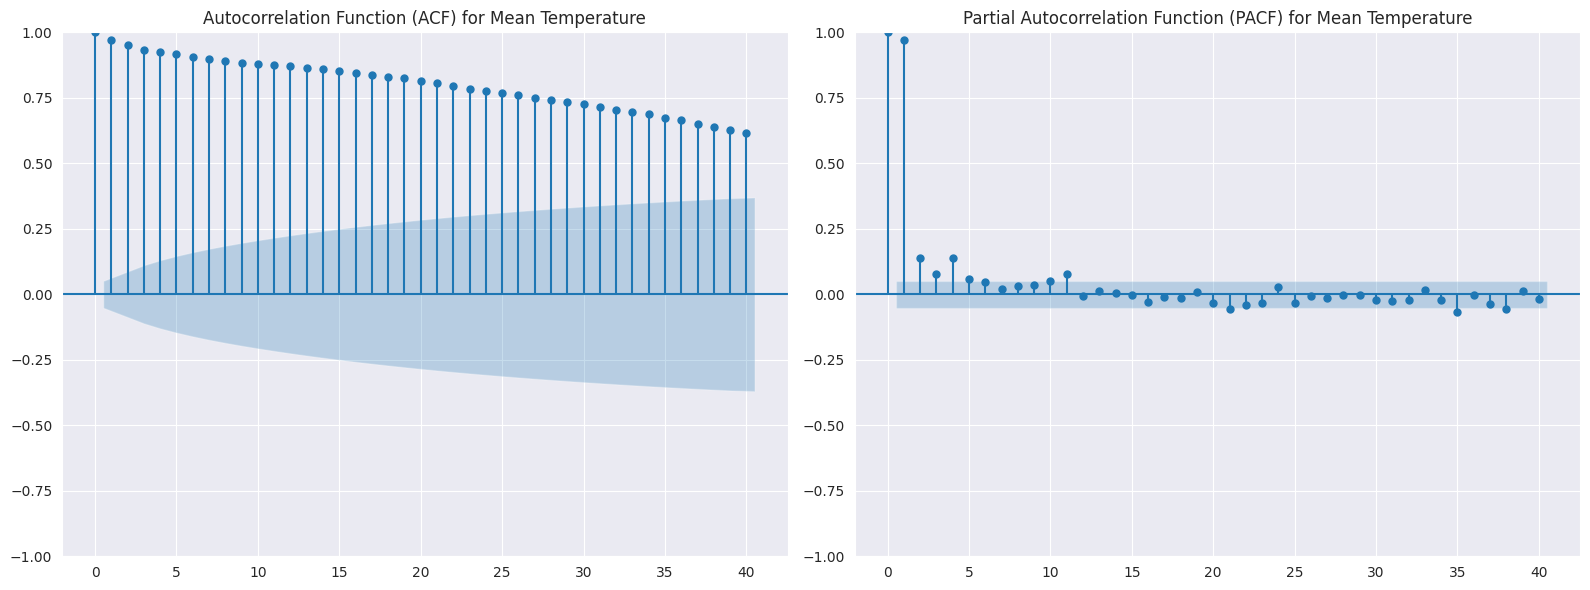

In [32]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot ACF
plot_acf(df1['meantemp'], ax=axes[0], lags=40, title='Autocorrelation Function (ACF) for Mean Temperature')

# Plot PACF
plot_pacf(df1['meantemp'], ax=axes[1], lags=40, title='Partial Autocorrelation Function (PACF) for Mean Temperature')

# Add some additional customization
for ax in axes:
    ax.tick_params(axis='x', labelsize=10)  # Adjust x-axis tick labels size
    ax.tick_params(axis='y', labelsize=10)  # Adjust y-axis tick labels size
    ax.grid(True)  # Add gridlines for better readability

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


The Series does not seem stationary, ACF has to become 0 at some point. But we are not certainly sure yet.

Let's confirm with the ADF and KPSS tests

#### ADF and KPSS:



To confirm the visual assessments of stationarity (due to trend and seasonality), the Dickey-Fuller and KPSS hypothesis tests are used:

  1. Augmented Dickey-Fuller Test (ADF)

    - Null Hypothesis H0: The series is not stationary
    - Alternative Hypothesis H1: The series is stationary
  2. Kwiatkowski-Phillips-Schmidt-Shin Test (KPSS)

    - Null Hypothesis H0: The series is stationary
    - Alternative Hypothesis H1: The series is not stationary

In [33]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss

def check_stationarity(series, alpha=0.05):
    print(f'\n___________________Checking Stationarity for: {series.name}___________________\n')

    # Handle missing values
    series = series.dropna()

    # ADF Test
    adf_test = adfuller(series.values)
    print('ADF Test:')
    print(f'ADF Statistic: {adf_test[0]}')
    print(f'p-value: {adf_test[1]}')
    print('Critical Values:')
    for key, value in adf_test[4].items():
        print(f'\t{key}: {value:.3f}')
    if adf_test[1] <= alpha and adf_test[4]['5%'] > adf_test[0]:
        print("\x1b[32mSeries is Stationary (ADF Test)\x1b[0m")
    else:
        print("\x1b[31mSeries is Non-stationary (ADF Test)\x1b[0m")

    print('-' * 50)

    # KPSS Test
    kpss_test = kpss(series.values, regression='c', nlags='auto')
    print('KPSS Test:')
    print(f'KPSS Statistic: {kpss_test[0]}')
    print(f'p-value: {kpss_test[1]}')
    print('Critical Values:')
    for key, value in kpss_test[3].items():
        print(f'\t{key}: {value:.3f}')
    if kpss_test[1] > alpha:
        print("\x1b[32mSeries is Stationary (KPSS Test)\x1b[0m")
    else:
        print("\x1b[31mSeries is Non-stationary (KPSS Test)\x1b[0m")


In [34]:
# Check initial stationarity for each feature
check_stationarity(df1['meantemp'])  # Target is non-stationary!!
check_stationarity(df1['humidity'])
check_stationarity(df1['wind_speed'])


___________________Checking Stationarity for: meantemp___________________

ADF Test:
ADF Statistic: -2.0210690559206737
p-value: 0.2774121372301601
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568
Series is Non-stationary (ADF Test)
--------------------------------------------------
KPSS Test:
KPSS Statistic: 0.18786352260533618
p-value: 0.1
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739
Series is Stationary (KPSS Test)

___________________Checking Stationarity for: humidity___________________



<ipython-input-33-4a35f81b44bf>:26: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.




ADF Test:
ADF Statistic: -3.675576919163339
p-value: 0.004470100478130758
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568
Series is Stationary (ADF Test)
--------------------------------------------------
KPSS Test:
KPSS Statistic: 0.09173654899480822
p-value: 0.1
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739
Series is Stationary (KPSS Test)

___________________Checking Stationarity for: wind_speed___________________



<ipython-input-33-4a35f81b44bf>:26: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.




ADF Test:
ADF Statistic: -3.838096756685109
p-value: 0.0025407221531463645
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568
Series is Stationary (ADF Test)
--------------------------------------------------
KPSS Test:
KPSS Statistic: 0.13773363518932444
p-value: 0.1
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739
Series is Stationary (KPSS Test)


<ipython-input-33-4a35f81b44bf>:26: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.




#### Apply differencing to make the series stationary


___________________Checking Stationarity for: meantemp___________________

ADF Test:
ADF Statistic: -2.0210690559206737
p-value: 0.2774121372301601
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568
Series is Non-stationary (ADF Test)
--------------------------------------------------
KPSS Test:
KPSS Statistic: 0.18786352260533618
p-value: 0.1
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739
Series is Stationary (KPSS Test)


############################### After Differencing ###############################



___________________Checking Stationarity for: meantemp___________________



<ipython-input-33-4a35f81b44bf>:26: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.




ADF Test:
ADF Statistic: -16.294070115924356
p-value: 3.3160864328179375e-29
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568
Series is Stationary (ADF Test)
--------------------------------------------------
KPSS Test:
KPSS Statistic: 0.18949327124525503
p-value: 0.1
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739
Series is Stationary (KPSS Test)


<ipython-input-33-4a35f81b44bf>:26: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.




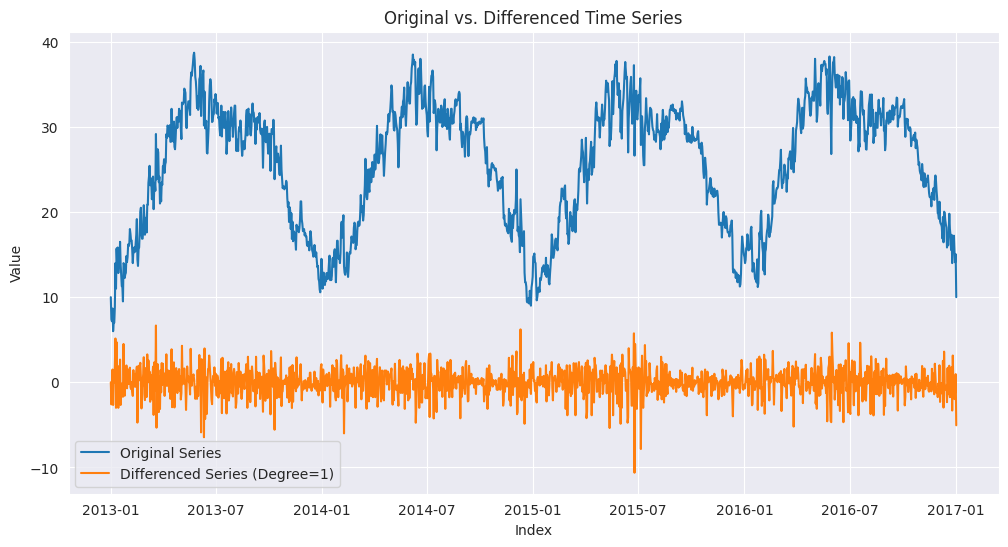

In [35]:
def check_stationarity_after_diff(series, diff_degree=1, alpha=0.05, plot=True):
    print('\n\n############################### After Differencing ###############################\n\n')

    # Apply differencing
    series_diff = series.diff(diff_degree).fillna(0)

    # Check stationarity after differencing
    check_stationarity(series_diff, alpha=alpha)

    # Optionally plot original and differenced series
    if plot:
        plt.figure(figsize=(12, 6))
        plt.plot(series, label='Original Series')
        plt.plot(series_diff, label=f'Differenced Series (Degree={diff_degree})')
        plt.title('Original vs. Differenced Time Series')
        plt.xlabel('Index')
        plt.ylabel('Value')
        plt.legend()
        plt.show()

# Check initial stationarity for 'meantemp' series
check_stationarity(df1['meantemp'])

# Check stationarity after differencing for 'meantemp' series
check_stationarity_after_diff(df1['meantemp'])

#### Interpreting ACF and PACF

Plotting the Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) before and after differencing is clear and concise

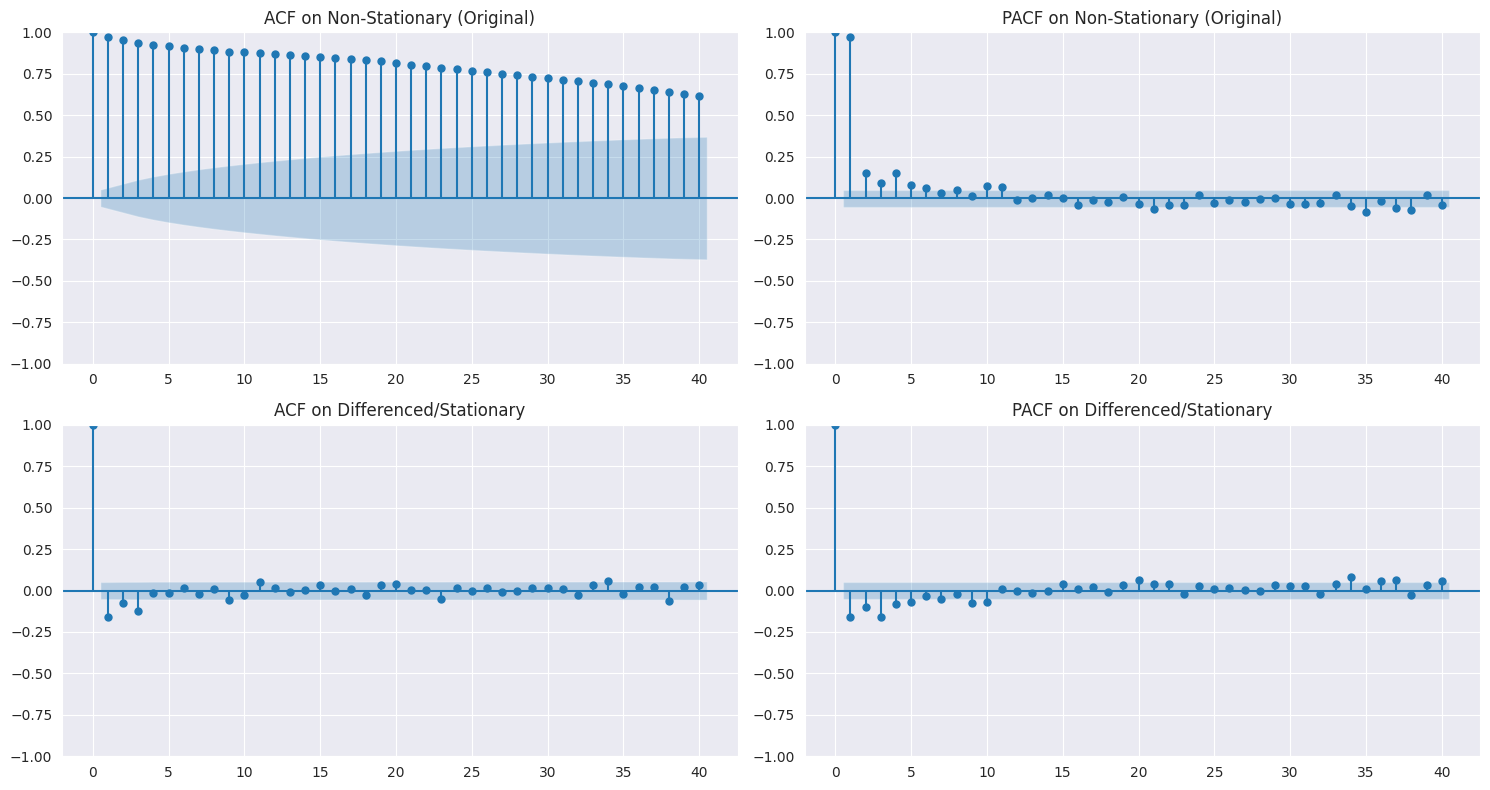

In [36]:
# Create 'meantemp_diff' column by differencing the 'meantemp' series
df1['meantemp_diff'] = df1['meantemp'].diff().fillna(0)

# Create subplots
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 8))

# Plot ACF and PACF for non-stationary 'meantemp' series
plot_acf(df1['meantemp'], lags=40, ax=ax[0, 0])
ax[0, 0].set_title('ACF on Non-Stationary (Original)')
plot_pacf(df1['meantemp'], lags=40, ax=ax[0, 1], method='ols')
ax[0, 1].set_title('PACF on Non-Stationary (Original)')

# Plot ACF and PACF for differenced/stationary 'meantemp' series
plot_acf(df1['meantemp_diff'], lags=40, ax=ax[1, 0])
ax[1, 0].set_title('ACF on Differenced/Stationary')
plot_pacf(df1['meantemp_diff'], lags=40, ax=ax[1, 1], method='ols')
ax[1, 1].set_title('PACF on Differenced/Stationary')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


- After differencing, the series has become stationary

#### ARIMA-SARIMA with Daily data

In [37]:
# Check DataFrame information
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1462 entries, 2013-01-01 to 2017-01-01
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   meantemp       1462 non-null   float64
 1   humidity       1462 non-null   float64
 2   wind_speed     1462 non-null   float64
 3   meantemp_diff  1462 non-null   float64
dtypes: float64(4)
memory usage: 57.1 KB


In [38]:
# Split the data into training and testing sets
train_size = int(len(df1) * 0.8)  # 80% training data, 20% testing data
train, test = df1.iloc[:train_size], df1.iloc[train_size:]

In [39]:
# Display training set information
print(f'Train shape: {train.shape}')

# Display testing set information
print(f'Test shape: {test.shape}')

Train shape: (1169, 4)
Test shape: (293, 4)


In [40]:
train.head()

meantemp  humidity  wind_speed  meantemp_diff
date                                                     
2013-01-01    10.000    84.500       0.000          0.000
2013-01-02     7.400    92.000       2.980         -2.600
2013-01-03     7.167    87.000       4.633         -0.233
2013-01-04     8.667    71.333       1.233          1.500
2013-01-05     6.000    86.833       3.700         -2.667

In [41]:
test.head()

meantemp  humidity  wind_speed  meantemp_diff
date                                                     
2016-03-15    24.067    58.933       8.647          1.692
2016-03-16    23.938    53.750      10.881         -0.129
2016-03-17    26.312    50.312       6.844          2.375
2016-03-18    26.188    61.250       6.713         -0.125
2016-03-19    26.786    61.857       3.579          0.598

ARIMA modeling process:

In [42]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Fit the ARIMA model
arima_model = ARIMA(train['meantemp'], order=(1,1,1))  # ARIMA(p,d,q)
arima_model_fit = arima_model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



In [43]:
# Make predictions
arima_pred = arima_model_fit.forecast(steps=len(test))

In [44]:
# Calculate error metrics
mse = mean_squared_error(test['meantemp'], arima_pred)
mae = mean_absolute_error(test['meantemp'], arima_pred)
print('Test MSE: %.3f' % mse)
print('Test MAE: %.3f' % mae)

Test MSE: 65.649
Test MAE: 7.274


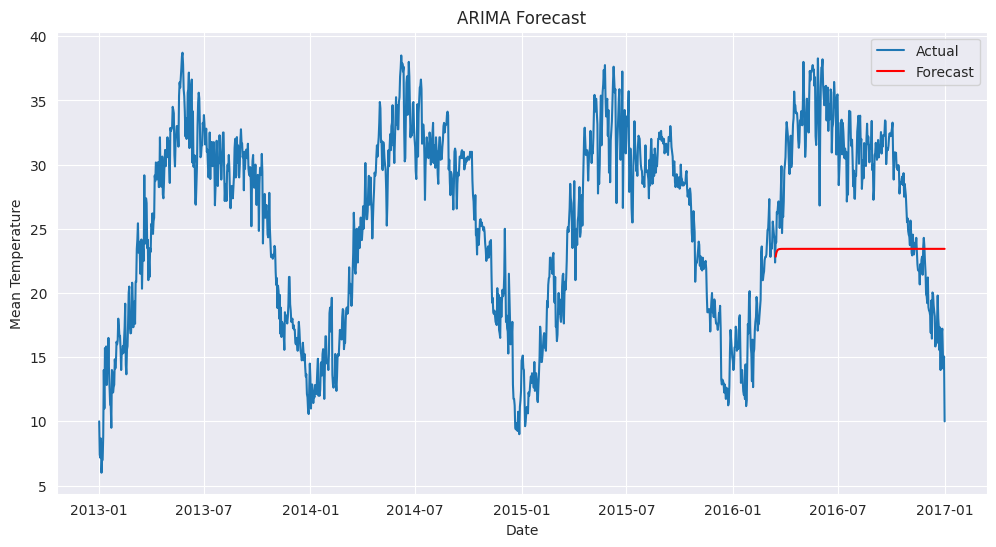

In [45]:
# Plot the entire time series with forecast
plt.figure(figsize=(12, 6))
plt.plot(df1.index, df1['meantemp'], label='Actual')
plt.plot(test.index, arima_pred, color='red', label='Forecast')
plt.xlabel('Date')
plt.ylabel('Mean Temperature')
plt.title('ARIMA Forecast')
plt.legend()
plt.show()

> Simple ARIMA Model is not suitable for this data (There is seasonality in our data)

SARIMAX modeling process:

In [46]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define the SARIMA model parameters
order = (1, 1, 6)  # Non-seasonal order (p, d, q)
seasonal_order = (1, 1, 1, 7)  # Seasonal order (P, D, Q, S)

In [47]:
# Fit the SARIMA model
sarima_model = SARIMAX(endog=train['meantemp'], exog=train[['humidity', 'wind_speed']],
                       order=order, seasonal_order=seasonal_order)
sarima_model_fit = sarima_model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [48]:
# Make predictions
sarima_pred = sarima_model_fit.predict(start=test.index[0], end=test.index[-1],
                                        exog=test[['humidity', 'wind_speed']])

In [49]:
# Calculate error metrics
mse = mean_squared_error(test['meantemp'], sarima_pred)
mae = mean_absolute_error(test['meantemp'], sarima_pred)
r2 = r2_score(test['meantemp'], sarima_pred)
print('Test MSE:', mse)
print('Test MAE:', mae)
print('Test R²: %.3f' % r2)

Test MSE: 42.816292335918604
Test MAE: 5.985470016051972
Test R²: -0.337


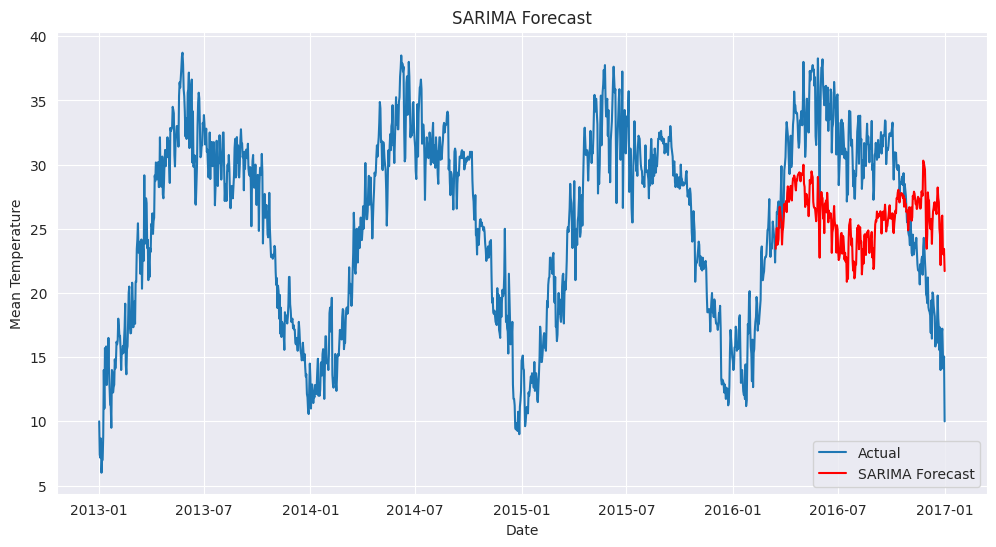

In [50]:
# Plot the entire time series with forecast
plt.figure(figsize=(12, 6))
plt.plot(df1.index, df1['meantemp'], label='Actual')
plt.plot(test.index, sarima_pred, color='red', label='SARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Mean Temperature')
plt.title('SARIMA Forecast')
plt.legend()
plt.show()

SARIMAX model with a differenced target:

In [51]:
# Fit the SARIMA model with differenced target
sarima_model = SARIMAX(endog=train['meantemp_diff'], exog=train[['humidity', 'wind_speed']],
                       order=order, seasonal_order=seasonal_order)
sarima_model_fit = sarima_model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [52]:
# Make predictions
sarima_pred_diff = sarima_model_fit.predict(start=test.index[0], end=test.index[-1],
                                            exog=test[['humidity', 'wind_speed']])


In [53]:
# Convert differenced predictions back to the original scale
last_original_value = train['meantemp'].iloc[-1]
sarima_pred = sarima_pred_diff.cumsum() + last_original_value

In [54]:
# Calculate error metrics
mse = mean_squared_error(test['meantemp'], sarima_pred)
mae = mean_absolute_error(test['meantemp'], sarima_pred)
r2 = r2_score(test['meantemp'], sarima_pred)
print('Test MSE:', mse)
print('Test MAE:', mae)
print('Test R²: %.3f' % r2)

Test MSE: 23.101728563026803
Test MAE: 3.9672954074343325
Test R²: 0.278


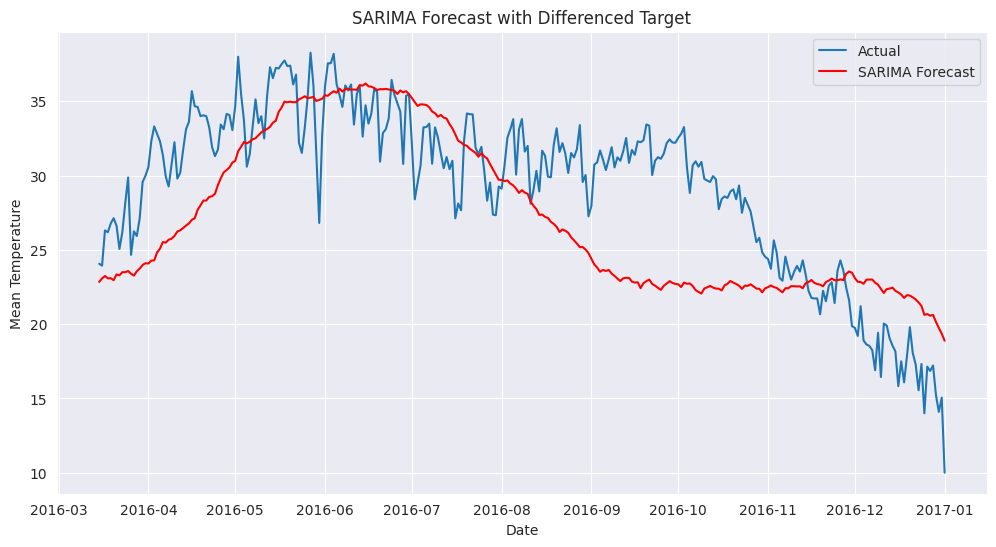

In [55]:
# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(test.index, test['meantemp'], label='Actual')
plt.plot(test.index, sarima_pred, color='red', label='SARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Mean Temperature')
plt.title('SARIMA Forecast with Differenced Target')
plt.legend()
plt.show()

#### ARIMA-SARIMA with Monthly data

In [56]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Resample the data to monthly frequency
monthly_df = df1.resample('M').mean()

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
m_train, m_test = train_test_split(monthly_df, test_size=0.2, shuffle=False)

# Split the data into training and testing sets
# train_size = int(len(monthly_df) * 0.8)
# m_train = monthly_df.iloc[:train_size]
# m_test = monthly_df.iloc[train_size:]

In [57]:
# Fit the ARIMA model
arima_model = ARIMA(m_train['meantemp'], order=(1, 0, 0))  # ARIMA(p,d,q)
arima_model_fit = arima_model.fit()

In [58]:
# Make predictions
arima_pred_m = arima_model_fit.forecast(steps=len(m_test))

In [59]:
# Calculate error metrics
mse = mean_squared_error(m_test['meantemp'], arima_pred_m)
mae = mean_absolute_error(m_test['meantemp'], arima_pred_m)
print('Test MSE: %.3f' % mse)
print('Test MAE: %.3f' % mae)

Test MSE: 64.547
Test MAE: 7.355


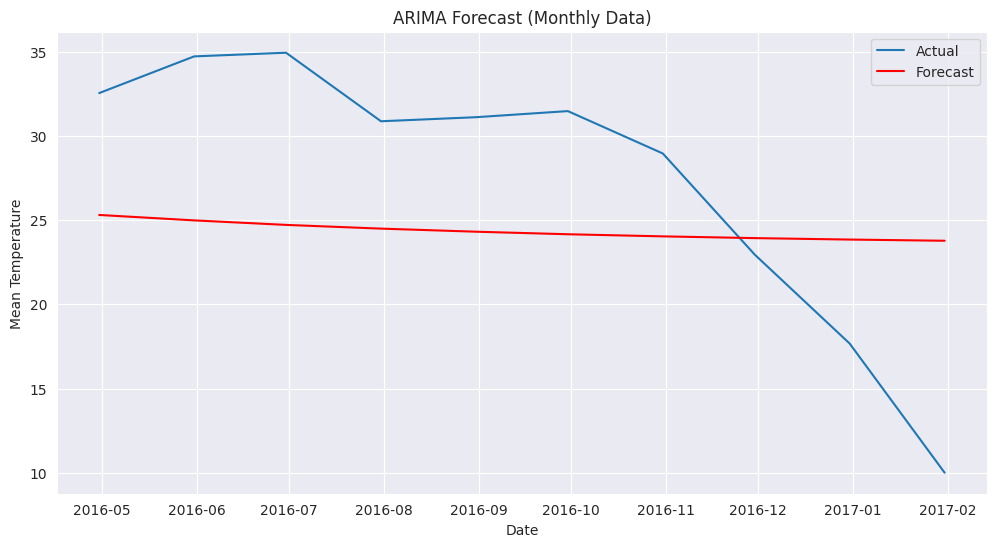

In [60]:
# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(m_test.index, m_test['meantemp'], label='Actual')
plt.plot(m_test.index, arima_pred_m, color='red', label='Forecast')
plt.xlabel('Date')
plt.ylabel('Mean Temperature')
plt.title('ARIMA Forecast (Monthly Data)')
plt.legend()
plt.show()

In [61]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define the SARIMA model parameters
order = (1, 0, 0)  # Non-seasonal order (p, d, q)
seasonal_order = (2, 1, 1, 12)  # Seasonal order (P, D, Q, S)

# Fit the SARIMA model
sarima_model = SARIMAX(endog=m_train['meantemp'], exog=m_train[['humidity', 'wind_speed']],
                       order=order, seasonal_order=seasonal_order)
sarima_model_fit = sarima_model.fit()

In [62]:
# Make predictions
sarima_pred_m = sarima_model_fit.predict(start=m_test.index[0], end=m_test.index[-1],
                                          exog=m_test[['humidity', 'wind_speed']])


In [63]:
# Calculate error metrics
mse = mean_squared_error(m_test['meantemp'], sarima_pred_m)
mae = mean_absolute_error(m_test['meantemp'], sarima_pred_m)
r2 = r2_score(m_test['meantemp'], sarima_pred_m)
print('Test MSE:', mse)
print('Test MAE:', mae)
print('Test R²: %.3f' % r2)

Test MSE: 3.7680503461440535
Test MAE: 1.841448179546115
Test R²: 0.937


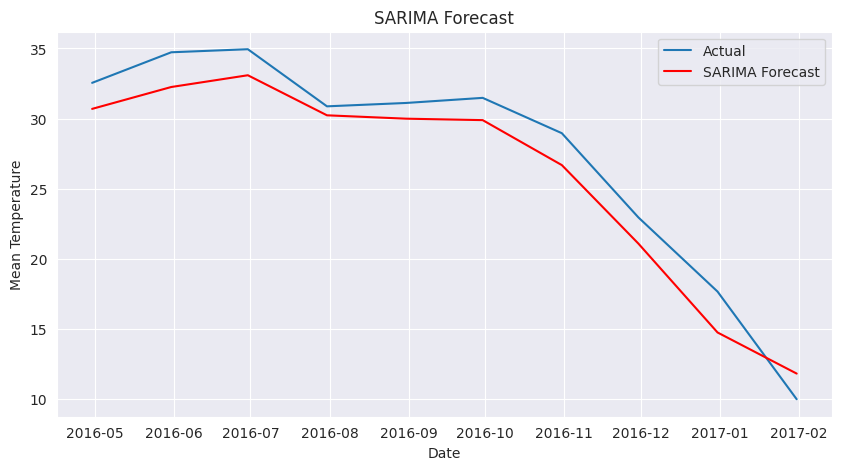

In [64]:
# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(m_test.index, m_test['meantemp'], label='Actual')
plt.plot(m_test.index, sarima_pred_m, color='red', label='SARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Mean Temperature')
plt.title('SARIMA Forecast')
plt.legend()
plt.show()

> I think figuring out the p, d, and q parameters are quite hard from ACF and PACF plots.

So we will try forecasting with auto_arima

#### Modeling with auto_arima (monthly prediction)

In [65]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 17.6 MB/s eta 0:00:00


In [66]:
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Fit the model on the training data with optimized settings for monthly seasonality
model = auto_arima(
    m_train['meantemp'],
    seasonal=True,
    m=12,
    max_p=7,
    max_d=1,
    max_q=3,
    max_P=3,
    max_D=1,
    max_Q=2,
    trace=True,    # To print the progress of the fitting
    error_action='ignore',  # Ignore potential errors
    suppress_warnings=True,  # Suppress warnings
    n_jobs=-1  # Use all available CPU cores
)

# Print model summary
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=inf, Time=0.99 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=104.420, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=100.592, Time=0.10 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.40 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=104.176, Time=0.02 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=106.408, Time=0.06 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=inf, Time=1.76 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.46 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=inf, Time=0.22 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=2.12 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=100.462, Time=0.14 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=inf, Time=4.36 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.87 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=inf, Time=0.53 sec
 ARIMA(0,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=4.01 sec
 ARIMA(

In [67]:
# Make predictions
n_periods = len(m_test)
auto_arima_pred = model.predict(n_periods=n_periods)

In [68]:
# Calculate evaluation metrics
r2 = r2_score(m_test['meantemp'], auto_arima_pred)
mse = mean_squared_error(m_test['meantemp'], auto_arima_pred)
mae = mean_absolute_error(m_test['meantemp'], auto_arima_pred)

print(f'R² score: {r2}')
print(f'MSE: {mse}')
print(f'MAE: {mae}')

R² score: 0.9155220005729787
MSE: 5.061236835556876
MAE: 1.8425268981948881


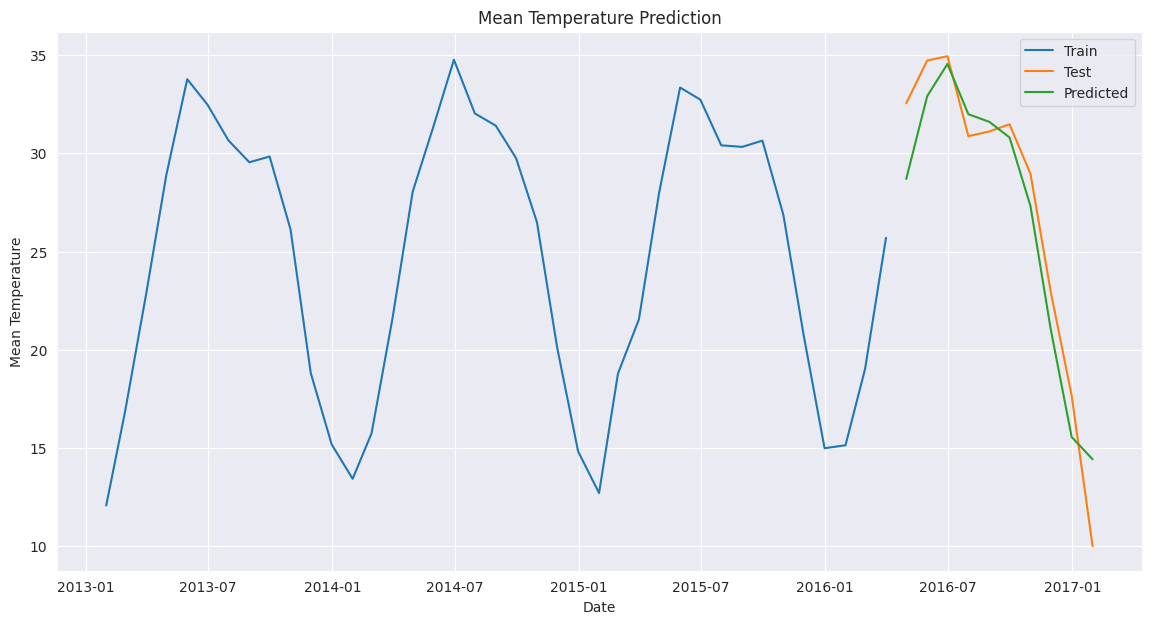

In [69]:
# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(m_train.index, m_train['meantemp'], label='Train')
plt.plot(m_test.index, m_test['meantemp'], label='Test')
plt.plot(m_test.index, auto_arima_pred, label='Predicted')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Mean Temperature')
plt.title('Mean Temperature Prediction')
plt.show()

### Prophet Model

Prophet algorithm predicts future values based on "ds" (dates) and "y" (observed values) inputs.

- **ds**: Contains dates, typically in daily frequency. Format: YYYY-MM-DD or timestamp.
- **y**: Contains observed values to predict (e.g., daily website visitors).

- **yhat**: Model's main prediction for a specific "ds" value.

- **yhat_lower** and **yhat_upper**: Represent uncertainty interval of predictions. Prophet considers uncertainty, estimating true values to fall within this range. For instance, if yhat_lower is 50 and yhat_upper is 60, the model predicts the true value with high confidence to be within this range.

In [70]:
df.head()

meantemp  humidity  wind_speed
date                                      
2013-01-01    10.000    84.500       0.000
2013-01-02     7.400    92.000       2.980
2013-01-03     7.167    87.000       4.633
2013-01-04     8.667    71.333       1.233
2013-01-05     6.000    86.833       3.700

#### Prophet Model without other features (humidity, wind_speed)

In [71]:
from prophet import Prophet

# Rename columns for Prophet
df_prophet = df.reset_index().rename(columns={'date': 'ds', 'meantemp': 'y'})

# Split the data into training and testing sets
train_size = int(len(df_prophet) * 0.8)
p_train, p_test = df_prophet.iloc[:train_size], df_prophet.iloc[train_size:]

In [72]:
# Initialize and fit the Prophet model
prop_model = Prophet()
prop_model.fit(p_train)

# Make future dataframe
future = prop_model.make_future_dataframe(periods=len(p_test), freq='D')

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcku6fyxg/kpxv59_m.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcku6fyxg/ff6lf0y7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28690', 'data', 'file=/tmp/tmpcku6fyxg/kpxv59_m.json', 'init=/tmp/tmpcku6fyxg/ff6lf0y7.json', 'output', 'file=/tmp/tmpcku6fyxg/prophet_modelvz1ro3fw/prophet_model-20240604064939.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:49:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:49:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [73]:
# Make predictions
forecast = prop_model.predict(future)

In [74]:
# Extract the forecasted values for the test period
predicted = forecast[['ds', 'yhat']].set_index('ds').loc[p_test['ds']]


In [75]:
# Calculate error and R²
mse = mean_squared_error(p_test['y'], predicted['yhat'])
r2 = r2_score(p_test['y'], predicted['yhat'])
print('Test MSE: %.3f' % mse)
print('Test R²: %.3f' % r2)

Test MSE: 7.338
Test R²: 0.771


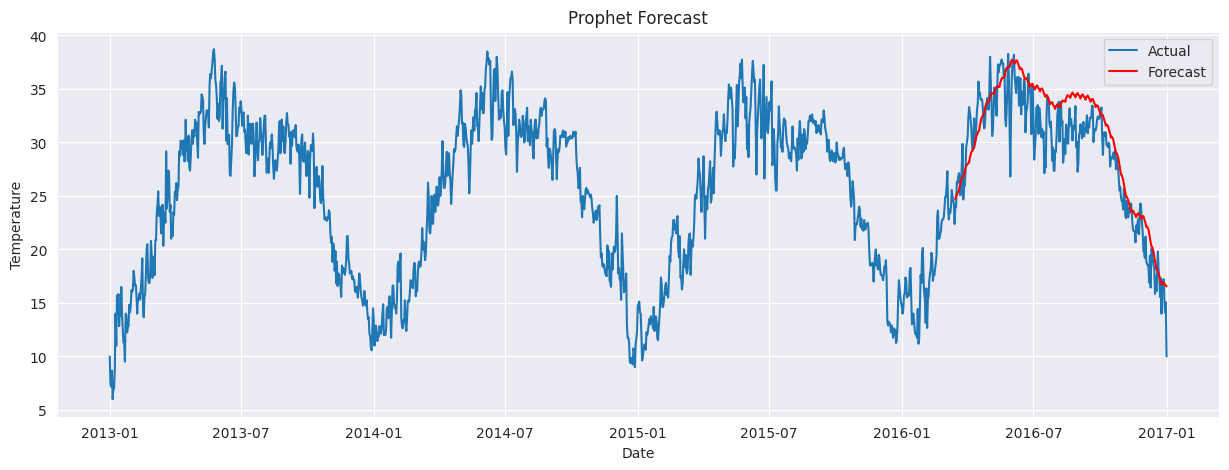

In [76]:
# Plot the results
plt.figure(figsize=(15, 5))
plt.plot(df_prophet['ds'], df_prophet['y'], label='Actual')
plt.plot(predicted.index, predicted['yhat'], color='red', label='Forecast')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Prophet Forecast')
plt.legend()
plt.show()

#### Prophet Model using the entire dataset:

In [77]:
from prophet import Prophet

# Rename columns for Prophet
df_prophet = df.reset_index().rename(columns={'date': 'ds', 'meantemp': 'y'})

# Add additional features
df_prophet['humidity'] = df['humidity'].values
df_prophet['wind_speed'] = df['wind_speed'].values

# Split the data into training and testing sets
train_size = int(len(df_prophet) * 0.8)
p_train, p_test = df_prophet.iloc[:train_size], df_prophet.iloc[train_size:]

In [78]:
# Initialize and fit the Prophet model
prop_model = Prophet()
prop_model.add_regressor('humidity')
prop_model.add_regressor('wind_speed')

prop_model.fit(p_train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcku6fyxg/kuwuvod6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcku6fyxg/jzy08stf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27179', 'data', 'file=/tmp/tmpcku6fyxg/kuwuvod6.json', 'init=/tmp/tmpcku6fyxg/jzy08stf.json', 'output', 'file=/tmp/tmpcku6fyxg/prophet_modeliyffxbdg/prophet_model-20240604064940.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:49:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:49:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [79]:
# Make future dataframe
future = prop_model.make_future_dataframe(periods=len(p_test), freq='D')
future['humidity'] = df['humidity'].values
future['wind_speed'] = df['wind_speed'].values

In [80]:
# Make predictions
forecast = prop_model.predict(future)

In [81]:
# Extract the forecasted values for the test period
predicted = forecast[['ds', 'yhat']].set_index('ds').loc[p_test['ds']]

In [82]:
# Calculate error and R²
mse = mean_squared_error(p_test['y'], predicted['yhat'])
r2 = r2_score(p_test['y'], predicted['yhat'])
print('Test MSE: %.3f' % mse)
print('Test R²: %.3f' % r2)

Test MSE: 2.752
Test R²: 0.914


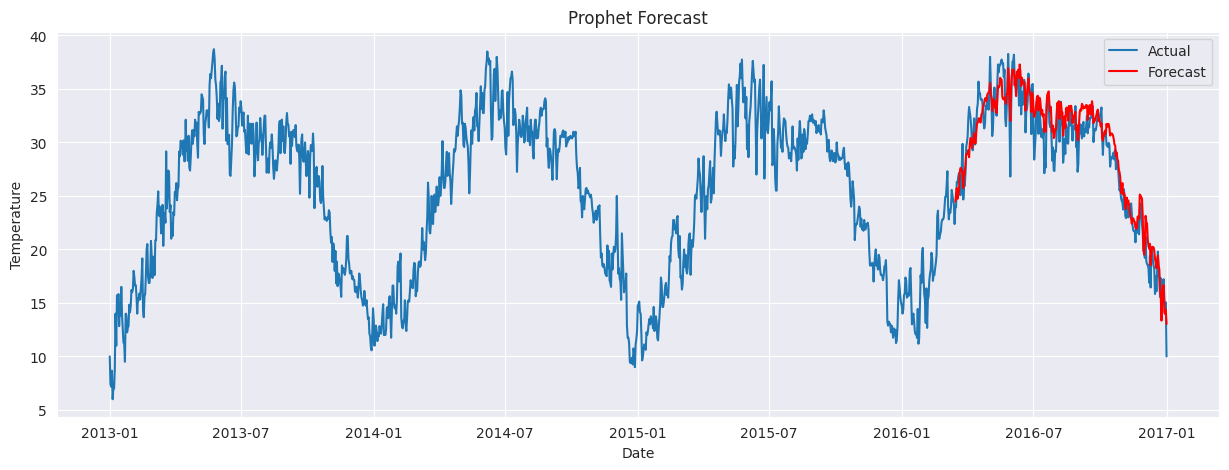

In [83]:
# Plot the results
plt.figure(figsize=(15, 5))
plt.plot(df_prophet['ds'], df_prophet['y'], label='Actual')
plt.plot(predicted.index, predicted['yhat'], color='red', label='Forecast')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Prophet Forecast')
plt.legend()
plt.show()

- The Prophet model achieved an R² score of ~91% when using the entire dataset with all features, indicating a high level of accuracy.

- In contrast, the R² score dropped to 76% when the model was trained without the additional features.

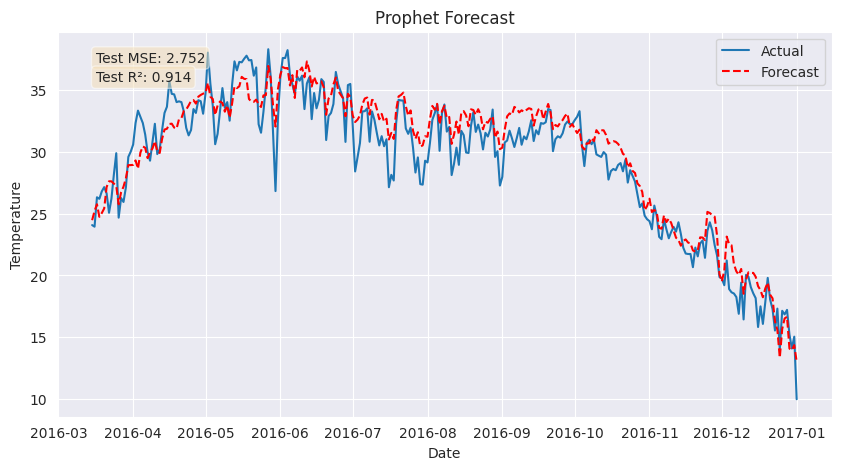

In [84]:
# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(p_test['ds'], p_test['y'], label='Actual')
plt.plot(predicted.index, predicted['yhat'], color='red', label='Forecast', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Prophet Forecast')
plt.legend()

# Add error metrics to the plot
plt.text(0.05, 0.95, f'Test MSE: {mse:.3f}', transform=plt.gca().transAxes, fontsize=10,
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.text(0.05, 0.9, f'Test R²: {r2:.3f}', transform=plt.gca().transAxes, fontsize=10,
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.show()

In [85]:
print(df_prophet.head()) # actual data

print(predicted.head()) # predicted values of p_test

          ds      y  humidity  wind_speed
0 2013-01-01 10.000    84.500       0.000
1 2013-01-02  7.400    92.000       2.980
2 2013-01-03  7.167    87.000       4.633
3 2013-01-04  8.667    71.333       1.233
4 2013-01-05  6.000    86.833       3.700
             yhat
ds               
2016-03-15 24.461
2016-03-16 25.202
2016-03-17 25.749
2016-03-18 24.732
2016-03-19 25.037


Confidence Interval:

In [86]:
forecast.head()

ds  trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0 2013-01-01 23.819       8.045      12.458       23.819       23.819   
1 2013-01-02 23.827       7.320      11.503       23.827       23.827   
2 2013-01-03 23.836       7.755      12.008       23.836       23.836   
3 2013-01-04 23.844       9.962      14.148       23.844       23.844   
4 2013-01-05 23.853       8.319      12.508       23.853       23.853   

   additive_terms  additive_terms_lower  additive_terms_upper  \
0         -13.498               -13.498               -13.498   
1         -14.348               -14.348               -14.348   
2         -13.913               -13.913               -13.913   
3         -11.787               -11.787               -11.787   
4         -13.464               -13.464               -13.464   

   extra_regressors_additive  extra_regressors_additive_lower  \
0                     -2.370                           -2.370   
1                     -3.351                           -3.351   
2                     -2.835                           -2.835   
3                     -0.893                           -0.893   
4                     -2.780                           -2.780   

   extra_regressors_additive_upper  humidity  humidity_lower  humidity_upper  \
0                           -2.370    -2.620          -2.620          -2.620   
1                           -3.351    -3.488          -3.488          -3.488   
2                           -2.835    -2.910          -2.910          -2.910   
3                           -0.893    -1.096          -1.096          -1.096   
4                           -2.780    -2.890          -2.890          -2.890   

   weekly  weekly_lower  weekly_upper  wind_speed  wind_speed_lower  \
0   0.060         0.060         0.060       0.250             0.250   
1   0.101         0.101         0.101       0.137             0.137   
2  -0.086        -0.086        -0.086       0.075             0.075   
3  -0.023        -0.023        -0.023       0.204             0.204   
4   0.058         0.058         0.058       0.110             0.110   

   wind_speed_upper  yearly  yearly_lower  yearly_upper  multiplicative_terms  \
0             0.250 -11.188       -11.188       -11.188                 0.000   
1             0.137 -11.098       -11.098       -11.098                 0.000   
2             0.075 -10.991       -10.991       -10.991                 0.000   
3             0.204 -10.871       -10.871       -10.871                 0.000   
4             0.110 -10.741       -10.741       -10.741                 0.000   

   multiplicative_terms_lower  multiplicative_terms_upper   yhat  
0                       0.000                       0.000 10.321  
1                       0.000                       0.000  9.479  
2                       0.000                       0.000  9.923  
3                       0.000                       0.000 12.058  
4                       0.000                       0.000 10.389

In [87]:
# Adding the actual temperature values to the forecast data
forecast['Actual Temperature'] = df_prophet['y']
forecast.rename(columns={'yhat': 'Forecast Temperature'}, inplace=False)
forecast.head()

ds  trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0 2013-01-01 23.819       8.045      12.458       23.819       23.819   
1 2013-01-02 23.827       7.320      11.503       23.827       23.827   
2 2013-01-03 23.836       7.755      12.008       23.836       23.836   
3 2013-01-04 23.844       9.962      14.148       23.844       23.844   
4 2013-01-05 23.853       8.319      12.508       23.853       23.853   

   additive_terms  additive_terms_lower  additive_terms_upper  \
0         -13.498               -13.498               -13.498   
1         -14.348               -14.348               -14.348   
2         -13.913               -13.913               -13.913   
3         -11.787               -11.787               -11.787   
4         -13.464               -13.464               -13.464   

   extra_regressors_additive  extra_regressors_additive_lower  \
0                     -2.370                           -2.370   
1                     -3.351                           -3.351   
2                     -2.835                           -2.835   
3                     -0.893                           -0.893   
4                     -2.780                           -2.780   

   extra_regressors_additive_upper  humidity  humidity_lower  humidity_upper  \
0                           -2.370    -2.620          -2.620          -2.620   
1                           -3.351    -3.488          -3.488          -3.488   
2                           -2.835    -2.910          -2.910          -2.910   
3                           -0.893    -1.096          -1.096          -1.096   
4                           -2.780    -2.890          -2.890          -2.890   

   weekly  weekly_lower  weekly_upper  wind_speed  wind_speed_lower  \
0   0.060         0.060         0.060       0.250             0.250   
1   0.101         0.101         0.101       0.137             0.137   
2  -0.086        -0.086        -0.086       0.075             0.075   
3  -0.023        -0.023        -0.023       0.204             0.204   
4   0.058         0.058         0.058       0.110             0.110   

   wind_speed_upper  yearly  yearly_lower  yearly_upper  multiplicative_terms  \
0             0.250 -11.188       -11.188       -11.188                 0.000   
1             0.137 -11.098       -11.098       -11.098                 0.000   
2             0.075 -10.991       -10.991       -10.991                 0.000   
3             0.204 -10.871       -10.871       -10.871                 0.000   
4             0.110 -10.741       -10.741       -10.741                 0.000   

   multiplicative_terms_lower  multiplicative_terms_upper   yhat  \
0                       0.000                       0.000 10.321   
1                       0.000                       0.000  9.479   
2                       0.000                       0.000  9.923   
3                       0.000                       0.000 12.058   
4                       0.000                       0.000 10.389   

   Actual Temperature  
0              10.000  
1               7.400  
2               7.167  
3               8.667  
4               6.000

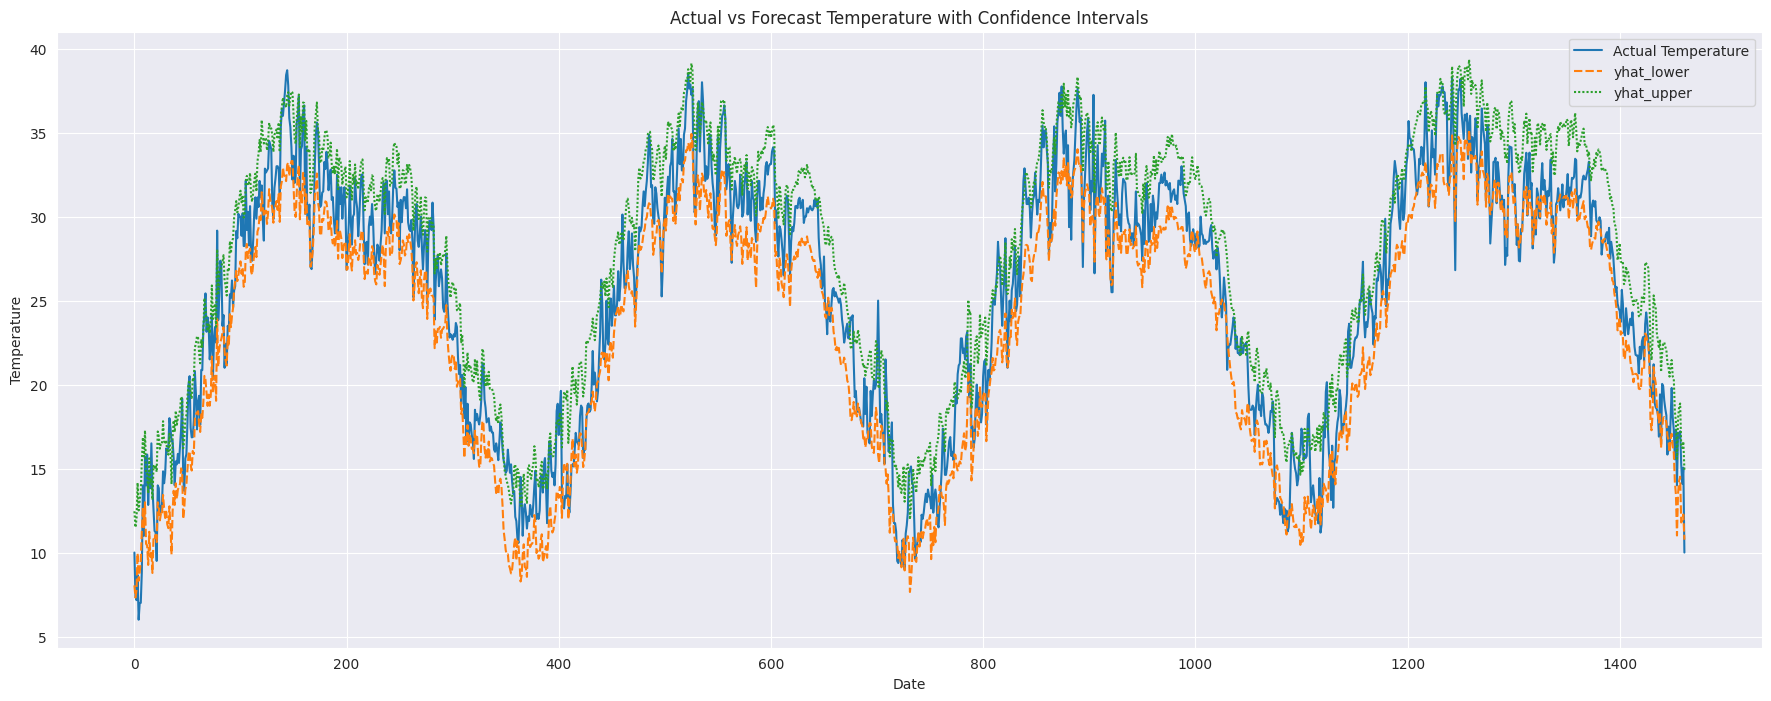

In [88]:
plt.figure(figsize=(22, 8))
sns.lineplot(data=forecast[['ds', 'Actual Temperature', 'yhat_lower', 'yhat_upper']])
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Actual vs Forecast Temperature with Confidence Intervals')
plt.show()

Detailed Analysis with plotly library:

In [89]:
from prophet.plot import plot_plotly
import plotly.offline as py

# Plot the forecast
fig = plot_plotly(prop_model, forecast)

# Customize the layout
fig.update_layout(
    title="Prophet Forecast with Actual vs Predicted Temperature",
    xaxis_title="Date",
    yaxis_title="Temperature",
    legend_title="",
)

# Show the plot
py.iplot(fig)

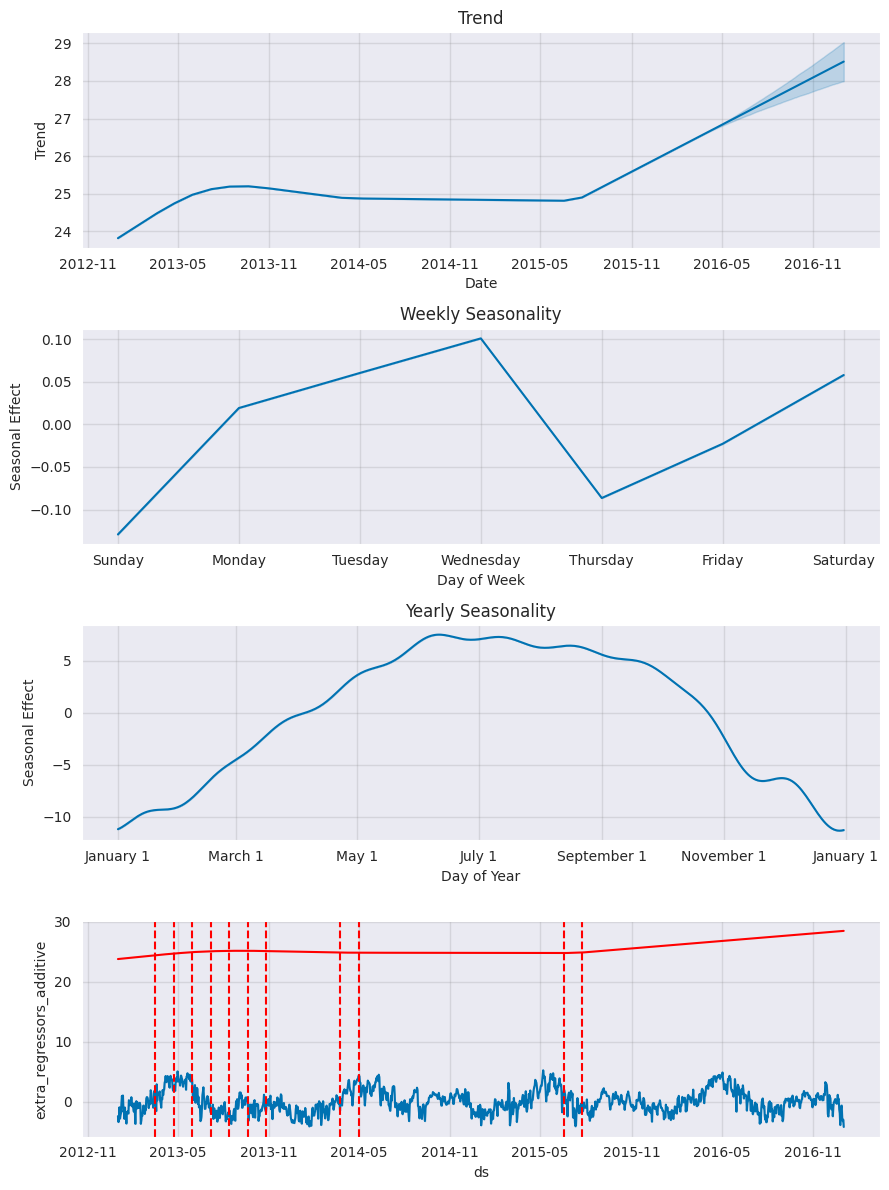

In [90]:
from prophet.plot import add_changepoints_to_plot
import matplotlib.pyplot as plt

# Plot the components of the forecast
fig = prop_model.plot_components(forecast)

# Customize the plots
axes = fig.get_axes()

# Trend plot
axes[0].set_title('Trend')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Trend')

# Weekly seasonality plot
axes[1].set_title('Weekly Seasonality')
axes[1].set_xlabel('Day of Week')
axes[1].set_ylabel('Seasonal Effect')

# Yearly seasonality plot
axes[2].set_title('Yearly Seasonality')
axes[2].set_xlabel('Day of Year')
axes[2].set_ylabel('Seasonal Effect')

# Add changepoints to the trend plot (if any)
fig = add_changepoints_to_plot(fig.gca(), prop_model, forecast)

# Display the plot
plt.tight_layout()
plt.show()


### Comparison of ARIMA, SARIMA &Prophet Model

In [91]:
# Predictions of ARIMA
print(arima_pred)

2016-03-15   22.826
2016-03-16   23.086
2016-03-17   23.235
2016-03-18   23.321
2016-03-19   23.370
              ...  
2016-12-28   23.437
2016-12-29   23.437
2016-12-30   23.437
2016-12-31   23.437
2017-01-01   23.437
Freq: D, Name: predicted_mean, Length: 293, dtype: float64


In [92]:
# Predictions of SARIMA
print(sarima_pred)

2016-03-15   22.845
2016-03-16   23.077
2016-03-17   23.245
2016-03-18   23.085
2016-03-19   23.092
              ...  
2016-12-28   20.620
2016-12-29   20.159
2016-12-30   19.746
2016-12-31   19.357
2017-01-01   18.886
Freq: D, Name: predicted_mean, Length: 293, dtype: float64


In [93]:
# predictions of Prophet
print(predicted)

             yhat
ds               
2016-03-15 24.461
2016-03-16 25.202
2016-03-17 25.749
2016-03-18 24.732
2016-03-19 25.037
...           ...
2016-12-28 16.661
2016-12-29 14.091
2016-12-30 13.965
2016-12-31 14.369
2017-01-01 13.032

[293 rows x 1 columns]


In [94]:
# Copying test data from arima/sarima models (for daily comparision)
pred_df = test.copy()
print(pred_df)

            meantemp  humidity  wind_speed  meantemp_diff
date                                                     
2016-03-15    24.067    58.933       8.647          1.692
2016-03-16    23.938    53.750      10.881         -0.129
2016-03-17    26.312    50.312       6.844          2.375
2016-03-18    26.188    61.250       6.713         -0.125
2016-03-19    26.786    61.857       3.579          0.598
...              ...       ...         ...            ...
2016-12-28    17.217    68.043       3.548          0.367
2016-12-29    15.238    87.857       6.000         -1.979
2016-12-30    14.095    89.667       6.267         -1.143
2016-12-31    15.053    87.000       7.325          0.957
2017-01-01    10.000   100.000       0.000         -5.053

[293 rows x 4 columns]


In [95]:
# Display the first few rows of the monthly test data
print(m_test.head())

# Adding the predictions from ARIMA, SARIMA, and Auto ARIMA models to the test data
m_test["arima_pred_m"] = arima_pred_m.round(2)
m_test["sarima_pred_m"] = sarima_pred_m.round(2)
m_test["auto_arima_pred"] = auto_arima_pred.round(2)

# Display the first few rows of the updated test data with predictions
print(m_test.head())

            meantemp  humidity  wind_speed  meantemp_diff
date                                                     
2016-04-30    32.550    29.244       9.687          0.102
2016-05-31    34.729    38.959       9.506         -0.014
2016-06-30    34.947    51.760       9.052          0.094
2016-07-31    30.876    75.430       6.207         -0.200
2016-08-31    31.117    72.993       7.168         -0.065
            meantemp  humidity  wind_speed  meantemp_diff  arima_pred_m  \
date                                                                      
2016-04-30    32.550    29.244       9.687          0.102        25.310   
2016-05-31    34.729    38.959       9.506         -0.014        24.990   
2016-06-30    34.947    51.760       9.052          0.094        24.720   
2016-07-31    30.876    75.430       6.207         -0.200        24.500   
2016-08-31    31.117    72.993       7.168         -0.065        24.320   

            sarima_pred_m  auto_arima_pred  
date                   

Adding predictions of ARIMA, SARIMA, and Prophet

In [96]:
# Adding predictions of ARIMA, SARIMA, and Prophet to the DataFrame
pred_df["arima_pred"] = arima_pred.values.round(2)
pred_df["sarima_pred"] = sarima_pred.values.round(2)
pred_df["prophet_yhat"] = predicted["yhat"].values.round(2)

# Display the first few rows of the DataFrame with predictions
print(pred_df)

            meantemp  humidity  wind_speed  meantemp_diff  arima_pred  \
date                                                                    
2016-03-15    24.067    58.933       8.647          1.692      22.830   
2016-03-16    23.938    53.750      10.881         -0.129      23.090   
2016-03-17    26.312    50.312       6.844          2.375      23.230   
2016-03-18    26.188    61.250       6.713         -0.125      23.320   
2016-03-19    26.786    61.857       3.579          0.598      23.370   
...              ...       ...         ...            ...         ...   
2016-12-28    17.217    68.043       3.548          0.367      23.440   
2016-12-29    15.238    87.857       6.000         -1.979      23.440   
2016-12-30    14.095    89.667       6.267         -1.143      23.440   
2016-12-31    15.053    87.000       7.325          0.957      23.440   
2017-01-01    10.000   100.000       0.000         -5.053      23.440   

            sarima_pred  prophet_yhat  
date      

Comparison of Forecasting Models: Prophet, ARIMA, and SARIMA on Daily and Monthly Temperature Data

In [97]:
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score
import math

# Prophet model evaluation metrics
prophet_mape = mean_absolute_percentage_error(pred_df["meantemp"].values, pred_df["prophet_yhat"].values)
prophet_r = r2_score(pred_df["meantemp"].values, pred_df["prophet_yhat"].values)
prophet_rmse = math.sqrt(mean_squared_error(pred_df["meantemp"].values, pred_df["prophet_yhat"].values))

# ARIMA model evaluation metrics
arima_mape = mean_absolute_percentage_error(pred_df["meantemp"].values, pred_df["arima_pred"].values)
arima_r = r2_score(pred_df["meantemp"].values, pred_df["arima_pred"].values)
arima_rmse = math.sqrt(mean_squared_error(pred_df["meantemp"].values, pred_df["arima_pred"].values))

# SARIMA model evaluation metrics
sarima_mape = mean_absolute_percentage_error(pred_df["meantemp"].values, pred_df["sarima_pred"].values)
sarima_r = r2_score(pred_df["meantemp"].values, pred_df["sarima_pred"].values)
sarima_rmse = math.sqrt(mean_squared_error(pred_df["meantemp"].values, pred_df["sarima_pred"].values))


In [98]:
# Monthly predictions evaluation metrics
arima_mape_m = mean_absolute_percentage_error(m_test["meantemp"].values, m_test["arima_pred_m"].values)
arima_r_m = r2_score(m_test["meantemp"].values, m_test["arima_pred_m"].values)
arima_rmse_m = math.sqrt(mean_squared_error(m_test["meantemp"].values, m_test["arima_pred_m"].values))

sarima_mape_m = mean_absolute_percentage_error(m_test["meantemp"].values, m_test["sarima_pred_m"].values)
sarima_r_m = r2_score(m_test["meantemp"].values, m_test["sarima_pred_m"].values)
sarima_rmse_m = math.sqrt(mean_squared_error(m_test["meantemp"].values, m_test["sarima_pred_m"].values))

autoarima_mape_m = mean_absolute_percentage_error(m_test["meantemp"].values, m_test["auto_arima_pred"].values)
autoarima_r_m = r2_score(m_test["meantemp"].values, m_test["auto_arima_pred"].values)
autoarima_rmse_m = math.sqrt(mean_squared_error(m_test["meantemp"].values, m_test["auto_arima_pred"].values))


In [99]:
# Creating a DataFrame to compare the metrics
compare_df = {
    'Prophet daily': [prophet_mape, prophet_rmse, prophet_r],
    'ARIMA daily': [arima_mape, arima_rmse, arima_r],
    'SARIMA daily': [sarima_mape, sarima_rmse, sarima_r],
    'ARIMA Monthly': [arima_mape_m, arima_rmse_m, arima_r_m],
    'SARIMA Monthly': [sarima_mape_m, sarima_rmse_m, sarima_r_m],
    'autoARIMA Monthly': [autoarima_mape_m, autoarima_rmse_m, autoarima_r_m]
}

compare_df = pd.DataFrame(compare_df, index=['MAPE', 'RMSE', 'R2'])
compare_df = compare_df.transpose()  # Transpose for better readability
compare_df


MAPE  RMSE     R2
Prophet daily     0.050 1.659  0.914
ARIMA daily       0.245 8.100 -1.050
SARIMA daily      0.143 4.807  0.278
ARIMA Monthly     0.339 8.034 -0.077
SARIMA Monthly    0.080 1.942  0.937
autoARIMA Monthly 0.096 2.250  0.915

## Deep Learning Models

### Data Preprocessing

In [100]:
# Importing necessary libraries
import gc  # Garbage collection for memory management

# Display the first few rows of the dataframe
df.head()

meantemp  humidity  wind_speed
date                                      
2013-01-01    10.000    84.500       0.000
2013-01-02     7.400    92.000       2.980
2013-01-03     7.167    87.000       4.633
2013-01-04     8.667    71.333       1.233
2013-01-05     6.000    86.833       3.700

In [101]:
# Split the data into training and testing sets
train_size = int(len(df) * 0.8)  # Define the size of the training set (80% of the data)

dl_train, dl_test = df.iloc[:train_size], df.iloc[train_size:]  # Split the data

print("Training set size:", len(dl_train), "\nTesting set size:", len(dl_test))  # Print the sizes of the sets


Training set size: 1169 
Testing set size: 293


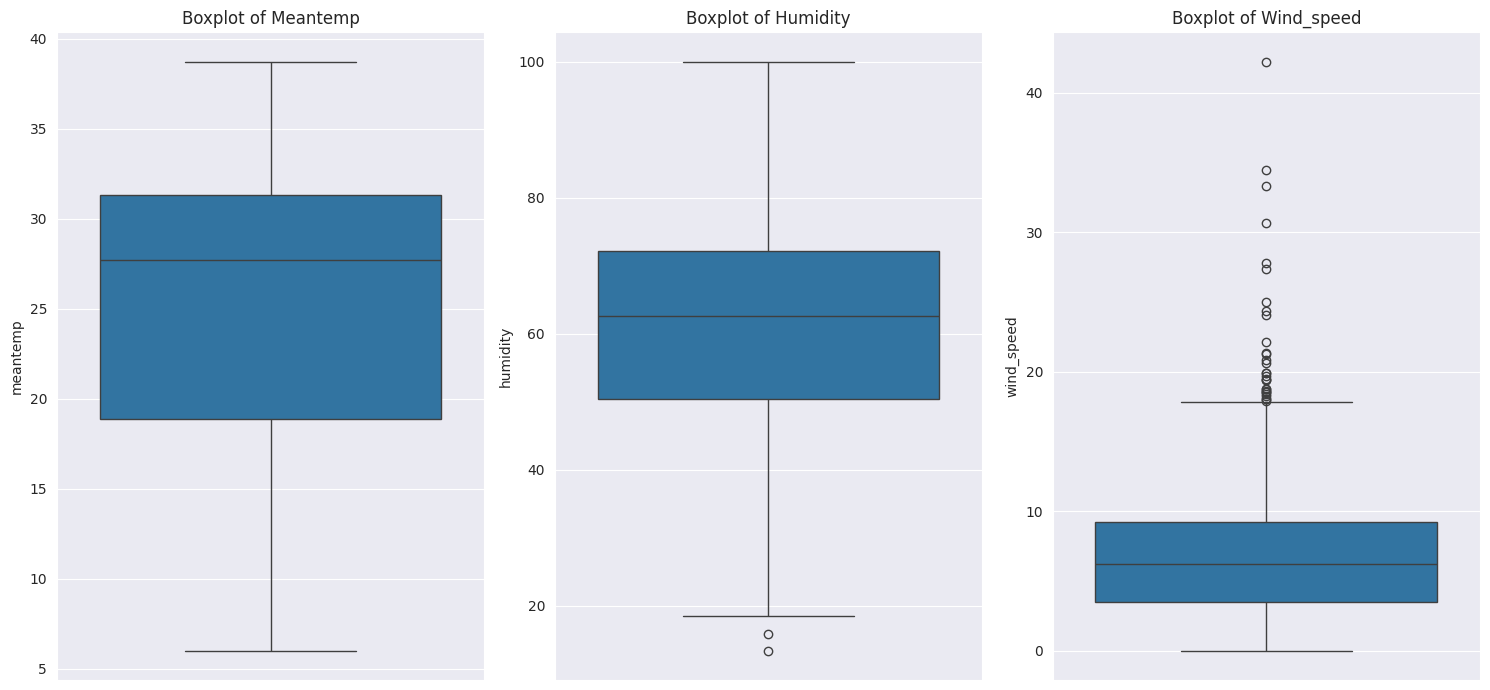

In [102]:
## Visualize the distribution of features

# Define the columns for which to plot boxplots
f_columns = ['meantemp', 'humidity', 'wind_speed']

# Plot boxplots for each feature
plt.figure(figsize=(15, 7))
for i, column in enumerate(f_columns, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=df[column])
    plt.title(f'Boxplot of {column.capitalize()}')

plt.tight_layout()
plt.show()

In [103]:
## Scaling data
from sklearn.preprocessing import RobustScaler, MinMaxScaler

# Define the scalers
robust_scaler = RobustScaler()   # RobustScaler For wind_speed
minmax_scaler = MinMaxScaler()    # MinMaxScaler For humidity and meantemp
target_transformer = MinMaxScaler()   # For the target variable (meantemp)


In [104]:
# Apply scaling to training data
dl_train['wind_speed'] = robust_scaler.fit_transform(dl_train[['wind_speed']])
dl_train['humidity'] = minmax_scaler.fit_transform(dl_train[['humidity']])
dl_train['meantemp'] = target_transformer.fit_transform(dl_train[['meantemp']])

# Apply scaling to testing data
dl_test['wind_speed'] = robust_scaler.transform(dl_test[['wind_speed']])
dl_test['humidity'] = minmax_scaler.transform(dl_test[['humidity']])
dl_test['meantemp'] = target_transformer.transform(dl_test[['meantemp']])

# Display the first few rows of both original and scaled dataframes
print(df.head())
print(dl_train.head())

            meantemp  humidity  wind_speed
date                                      
2013-01-01    10.000    84.500       0.000
2013-01-02     7.400    92.000       2.980
2013-01-03     7.167    87.000       4.633
2013-01-04     8.667    71.333       1.233
2013-01-05     6.000    86.833       3.700
            meantemp  humidity  wind_speed
date                                      
2013-01-01     0.122     0.840      -1.018
2013-01-02     0.043     0.929      -0.496
2013-01-03     0.036     0.870      -0.207
2013-01-04     0.082     0.685      -0.802
2013-01-05     0.000     0.868      -0.370


### Simple RNN Model

In [105]:
## Creating a dataset suitable for RNN input
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)


In [106]:
# Create sequences
time_steps = 10 # Use the past 10 time steps to predict the value at the next time step

X, y = dl_train[['humidity', 'wind_speed']], dl_train['meantemp']

X_train, y_train = create_dataset(X, y, time_steps)
X_test, y_test = create_dataset(dl_test[['humidity', 'wind_speed']], dl_test['meantemp'], time_steps)

# Check the shape of the datasets
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X_train shape: (1159, 10, 2), y_train shape: (1159,)
X_test shape: (283, 10, 2), y_test shape: (283,)


In [107]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import RobustScaler, MinMaxScaler
import matplotlib.pyplot as plt

# Build the RNN model
rnn_model = Sequential()
rnn_model.add(SimpleRNN(100, activation='tanh', input_shape=(time_steps, X_train.shape[2])))
rnn_model.add(Dense(1))
rnn_model.compile(optimizer='adam', loss='mse')

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with early stopping
history = rnn_model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test), batch_size=32, callbacks=[early_stopping])

# Evaluate the model
loss = rnn_model.evaluate(X_test, y_test)
print(f'Validation Loss: {loss}')

Epoch 1/30
37/37 [==============================] - 2s 12ms/step - loss: 0.1191 - val_loss: 0.0544
Epoch 2/30
37/37 [==============================] - 0s 5ms/step - loss: 0.0520 - val_loss: 0.0315
Epoch 3/30
37/37 [==============================] - 0s 5ms/step - loss: 0.0366 - val_loss: 0.0324
Epoch 4/30
37/37 [==============================] - 0s 5ms/step - loss: 0.0318 - val_loss: 0.0322
Epoch 5/30
37/37 [==============================] - 0s 5ms/step - loss: 0.0317 - val_loss: 0.0394
Epoch 6/30
37/37 [==============================] - 0s 6ms/step - loss: 0.0287 - val_loss: 0.0442
Epoch 7/30
37/37 [==============================] - 0s 9ms/step - loss: 0.0292 - val_loss: 0.0351
Epoch 8/30
37/37 [==============================] - 0s 10ms/step - loss: 0.0275 - val_loss: 0.0473
Epoch 9/30
37/37 [==============================] - 0s 10ms/step - loss: 0.0291 - val_loss: 0.0308
Epoch 10/30
37/37 [==============================] - 0s 10ms/step - loss: 0.0282 - val_loss: 0.0471
Epoch 11/30
37/

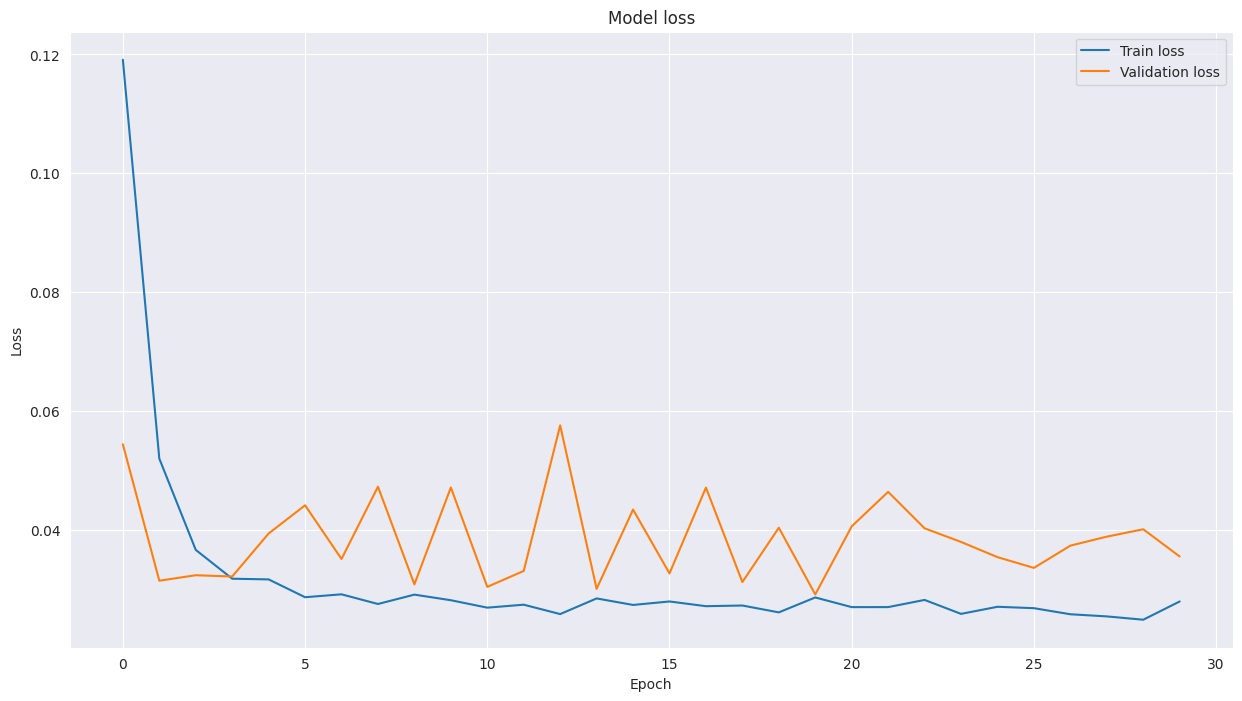

In [108]:
# Plot training & validation loss values
plt.figure(figsize=(15, 8))
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

In [109]:
# Make predictions
rnn_pred = rnn_model.predict(X_test)

# Inverse transform the predictions to the original scale
rnn_pred = target_transformer.inverse_transform(rnn_pred)

# Inverse transform the true values for comparison
y_test = y_test.reshape(-1, 1)  # Ensure y_test is in the correct shape
y_test = target_transformer.inverse_transform(y_test)

# Display the first few predictions and actual values for comparison
pred_df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': rnn_pred.flatten()})
print(pred_df.head())


9/9 [==============================] - 1s 4ms/step
   Actual  Predicted
0  29.875     26.566
1  24.667     28.183
2  26.250     27.401
3  25.933     29.212
4  27.125     28.703


In [110]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Calculate evaluation metrics
rnn_mse = mean_squared_error(y_test, rnn_pred)
rnn_rmse = np.sqrt(rnn_mse)
rnn_mae = mean_absolute_error(y_test, rnn_pred)
rnn_r2 = r2_score(y_test, rnn_pred)

# Print evaluation metrics
print(f'RNN Model Performance:')
# print(f'MSE: {rnn_mse:.3f}')
print(f'RMSE: {rnn_rmse:.3f}')
# print(f'MAE: {rnn_mae:.3f}')
print(f'R²: {rnn_r2:.3f}')

RNN Model Performance:
RMSE: 5.586
R²: 0.046


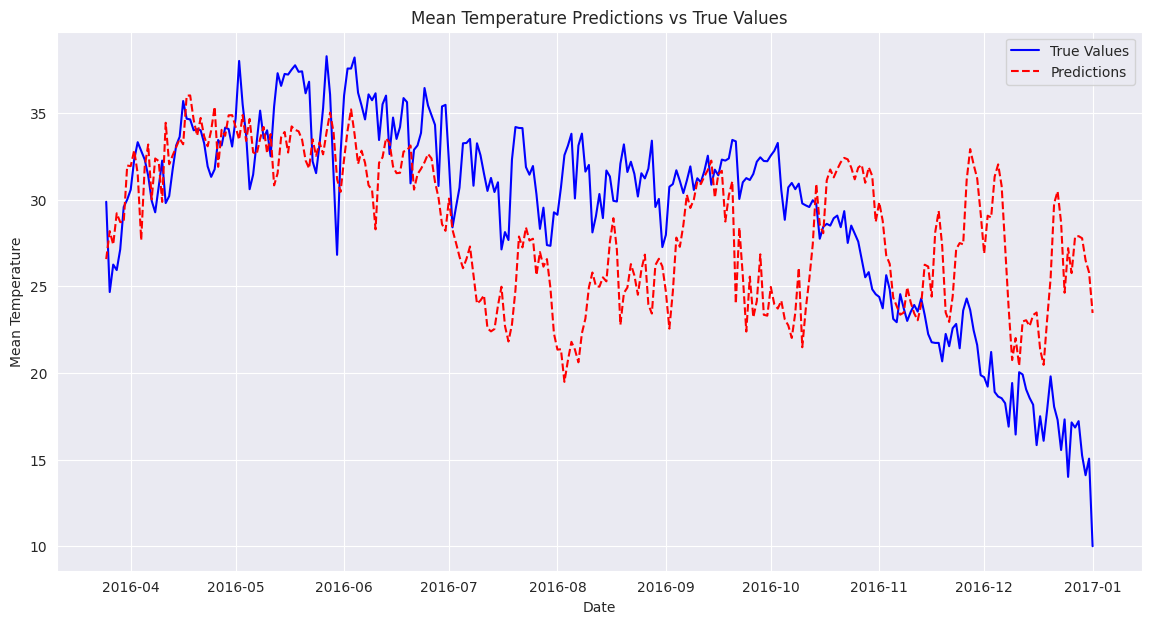

In [111]:
# Plotting the results
plt.figure(figsize=(14, 7))
plt.plot(df.index[-len(y_test):], y_test, label='True Values', color='blue')
plt.plot(df.index[-len(y_test):], rnn_pred, label='Predictions', linestyle='dashed', color='red')
plt.xlabel('Date')
plt.ylabel('Mean Temperature')
plt.title('Mean Temperature Predictions vs True Values')
plt.legend()
plt.show()


In [112]:
# Display the model summary
rnn_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 100)               10300     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 10401 (40.63 KB)
Trainable params: 10401 (40.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


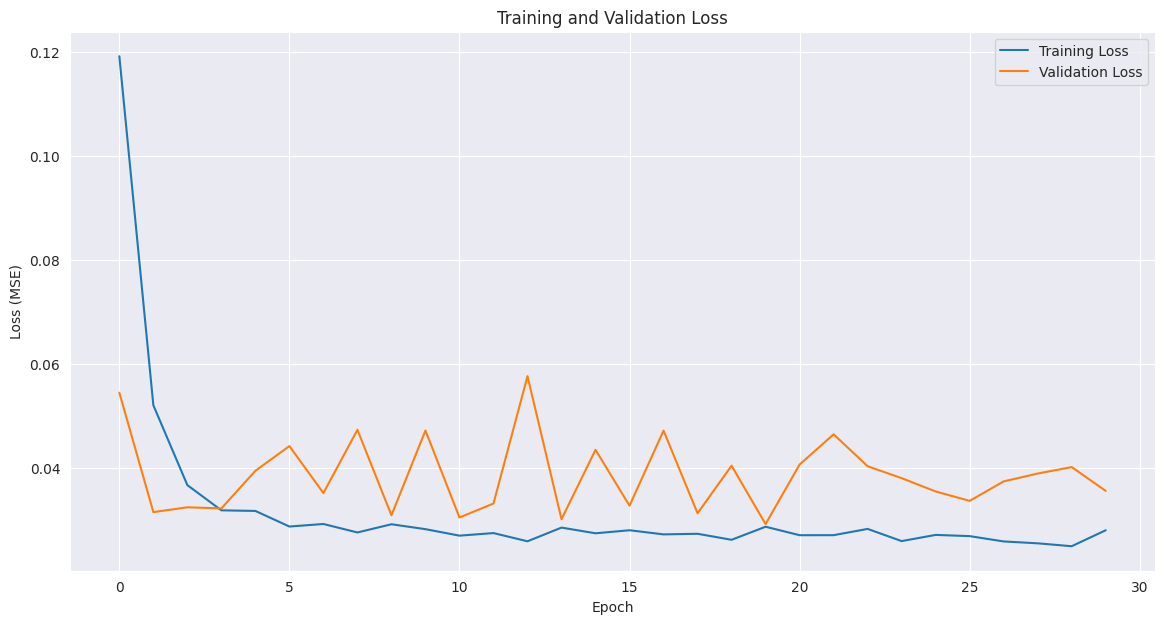

In [113]:
# Get training and validation losses from history
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Plot loss values over epochs
plt.figure(figsize=(14, 7))
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)  # Add grid for better readability
plt.show()


### LSTM Model

In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping

In [115]:
# Define sequence length
time_steps = 10  # Adjust based on your data and experimentation

# Create training and testing datasets
X_train, y_train = create_dataset(dl_train, dl_train['meantemp'], time_steps)
X_test, y_test = create_dataset(dl_test, dl_test['meantemp'], time_steps)


In [116]:
# Build the LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(100, activation='tanh', return_sequences=True, input_shape=(time_steps, X_train.shape[2])))
lstm_model.add(LSTM(50, activation='tanh'))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mse')

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = lstm_model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), batch_size=32, callbacks=[early_stopping])

# Evaluate the model
loss = lstm_model.evaluate(X_test, y_test)
print(f'Validation Loss: {loss}')

Epoch 1/50
37/37 [==============================] - 11s 86ms/step - loss: 0.0473 - val_loss: 0.0068
Epoch 2/50
37/37 [==============================] - 1s 34ms/step - loss: 0.0062 - val_loss: 0.0055
Epoch 3/50
37/37 [==============================] - 1s 32ms/step - loss: 0.0049 - val_loss: 0.0053
Epoch 4/50
37/37 [==============================] - 1s 27ms/step - loss: 0.0050 - val_loss: 0.0050
Epoch 5/50
37/37 [==============================] - 1s 33ms/step - loss: 0.0051 - val_loss: 0.0051
Epoch 6/50
37/37 [==============================] - 1s 28ms/step - loss: 0.0047 - val_loss: 0.0044
Epoch 7/50
37/37 [==============================] - 1s 20ms/step - loss: 0.0046 - val_loss: 0.0048
Epoch 8/50
37/37 [==============================] - 1s 16ms/step - loss: 0.0043 - val_loss: 0.0044
Epoch 9/50
37/37 [==============================] - 1s 15ms/step - loss: 0.0043 - val_loss: 0.0046
Epoch 10/50
37/37 [==============================] - 1s 16ms/step - loss: 0.0043 - val_loss: 0.0053
Epoch 11

In [117]:
lstm_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 100)           41600     
                                                                 
 lstm_1 (LSTM)               (None, 50)                30200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 71851 (280.67 KB)
Trainable params: 71851 (280.67 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [118]:
# Make predictions
lstm_pred = lstm_model.predict(X_test)
lstm_pred = target_transformer.inverse_transform(lstm_pred)  # Inverse transform to original scale

9/9 [==============================] - 1s 5ms/step


In [119]:
# Inverse transform the true values for comparison
y_test = y_test.reshape(-1, 1)
y_test = target_transformer.inverse_transform(y_test)

RMSE: 1.6504807785420472
R2 Score: 0.9167363098334055


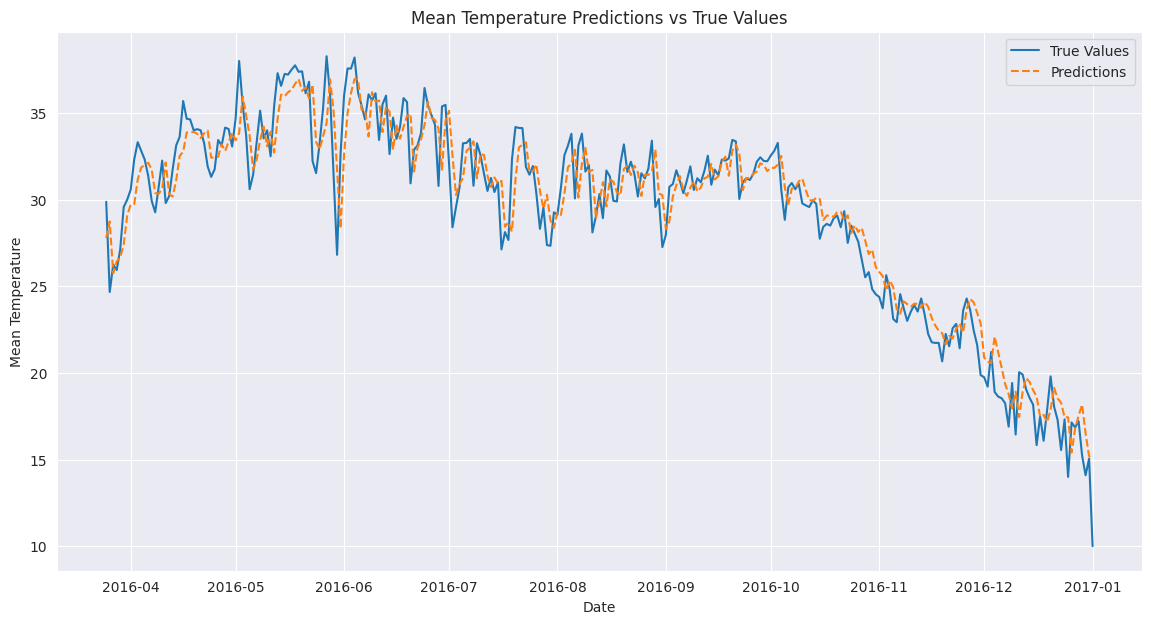

In [120]:
# Calculate RMSE and R2 scores
rmse = np.sqrt(mean_squared_error(y_test, lstm_pred))
r2 = r2_score(y_test, lstm_pred)

print(f'RMSE: {rmse}')
print(f'R2 Score: {r2}')

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(df.index[-len(y_test):], y_test, label='True Values')
plt.plot(df.index[-len(y_test):], lstm_pred, label='Predictions', linestyle='dashed')
plt.xlabel('Date')
plt.ylabel('Mean Temperature')
plt.title('Mean Temperature Predictions vs True Values')
plt.legend()
plt.show()

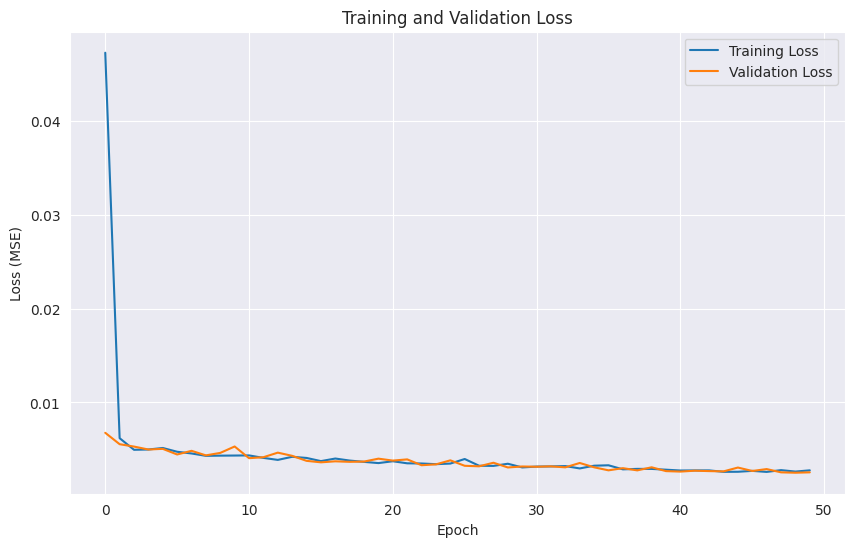

In [121]:
# Plotting training and validation loss
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

plt.figure(figsize=(10, 6))
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

### Bidirectional LSTM

In [124]:
from tensorflow.keras.layers import LSTM, Bidirectional, Dense

# Create sequences
sequence_length = 10  # Adjust based on your data and experimentation
X_train, y_train = create_dataset(dl_train, dl_train['meantemp'], sequence_length)
X_test, y_test = create_dataset(dl_test, dl_test['meantemp'], sequence_length)

In [125]:
# Build the bidirectional LSTM model
model = Sequential()
model.add(Bidirectional(LSTM(100, activation='tanh', input_shape=(sequence_length, X_train.shape[2]))))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test), batch_size=32, callbacks=[early_stopping])

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Validation Loss: {loss}')

Epoch 1/30
37/37 [==============================] - 24s 67ms/step - loss: 0.0446 - val_loss: 0.0057
Epoch 2/30
37/37 [==============================] - 1s 15ms/step - loss: 0.0055 - val_loss: 0.0046
Epoch 3/30
37/37 [==============================] - 0s 13ms/step - loss: 0.0047 - val_loss: 0.0046
Epoch 4/30
37/37 [==============================] - 1s 14ms/step - loss: 0.0046 - val_loss: 0.0044
Epoch 5/30
37/37 [==============================] - 1s 14ms/step - loss: 0.0043 - val_loss: 0.0043
Epoch 6/30
37/37 [==============================] - 1s 14ms/step - loss: 0.0042 - val_loss: 0.0042
Epoch 7/30
37/37 [==============================] - 1s 14ms/step - loss: 0.0041 - val_loss: 0.0040
Epoch 8/30
37/37 [==============================] - 1s 14ms/step - loss: 0.0040 - val_loss: 0.0046
Epoch 9/30
37/37 [==============================] - 1s 14ms/step - loss: 0.0041 - val_loss: 0.0038
Epoch 10/30
37/37 [==============================] - 1s 14ms/step - loss: 0.0039 - val_loss: 0.0037
Epoch 11

In [126]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_1 (Bidirecti  (None, 200)               83200     
 onal)                                                           
                                                                 
 dense_3 (Dense)             (None, 1)                 201       
                                                                 
Total params: 83401 (325.79 KB)
Trainable params: 83401 (325.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [127]:
# Make predictions
bilstm_pred = model.predict(X_test)
bilstm_pred = target_transformer.inverse_transform(bilstm_pred)  # Inverse transform to original scale

# Inverse transform the true values for comparison
y_test = y_test.reshape(-1, 1)
y_test = target_transformer.inverse_transform(y_test)

9/9 [==============================] - 1s 5ms/step


RMSE: 1.8336697883866466
R² Score: 0.8972274879947981


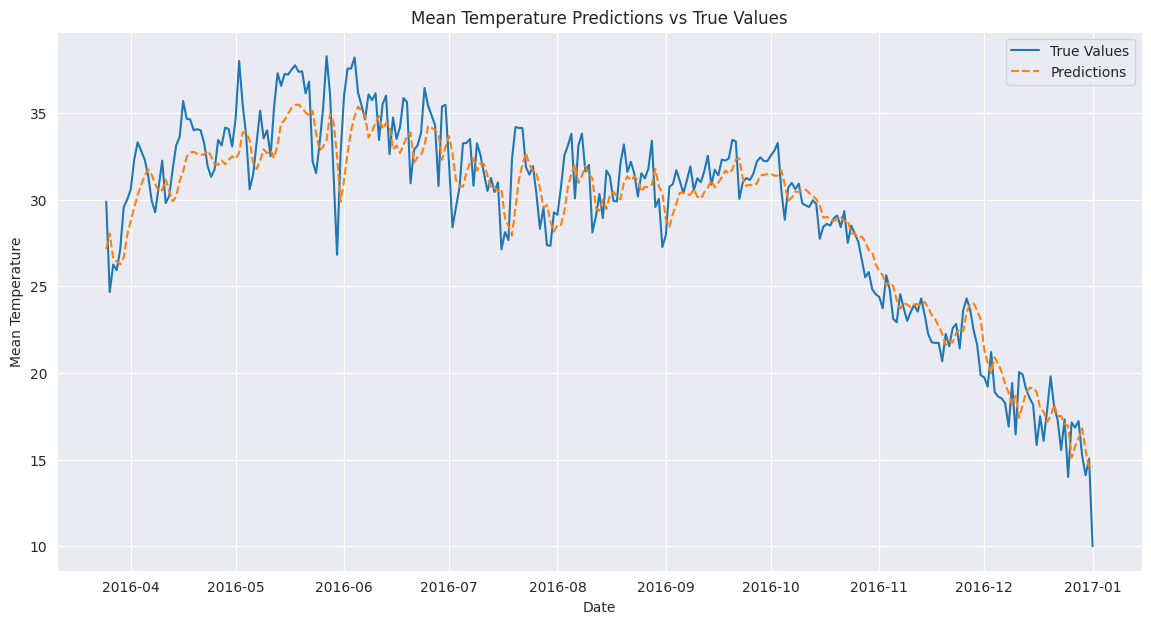

In [128]:
# Calculate RMSE and R² scores
rmse = np.sqrt(mean_squared_error(y_test, bilstm_pred))
r2 = r2_score(y_test, bilstm_pred)

print(f'RMSE: {rmse}')
print(f'R² Score: {r2}')

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(df.index[-len(y_test):], y_test, label='True Values')
plt.plot(df.index[-len(y_test):], bilstm_pred, label='Predictions', linestyle='dashed')
plt.xlabel('Date')
plt.ylabel('Mean Temperature')
plt.title('Mean Temperature Predictions vs True Values')
plt.legend()
plt.show()

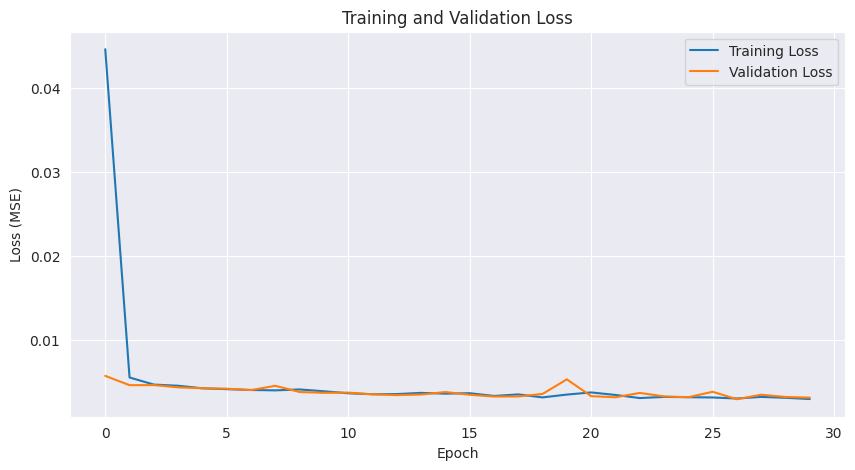

In [129]:
# Plot training and validation loss
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

plt.figure(figsize=(10, 5))
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

### GRU Model

In [130]:
# Create sequences
sequence_length = 10  # Adjust based on your data and experimentation
X_train, y_train = create_dataset(dl_train, dl_train['meantemp'], sequence_length)
X_test, y_test = create_dataset(dl_test, dl_test['meantemp'], sequence_length)

In [131]:
from tensorflow.keras.layers import GRU

# Build the bidirectional LSTM model
gru_model = Sequential()
gru_model.add(Bidirectional(GRU(100, activation='tanh', input_shape=(sequence_length, X_train.shape[2]))))
gru_model.add(Dense(1))
gru_model.compile(optimizer='adam', loss='mse')

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = gru_model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test), batch_size=32, callbacks=[early_stopping])

# Evaluate the model
loss = gru_model.evaluate(X_test, y_test)
print(f'Validation Loss: {loss}')

Epoch 1/30
37/37 [==============================] - 7s 35ms/step - loss: 0.0671 - val_loss: 0.0064
Epoch 2/30
37/37 [==============================] - 1s 14ms/step - loss: 0.0058 - val_loss: 0.0045
Epoch 3/30
37/37 [==============================] - 0s 13ms/step - loss: 0.0042 - val_loss: 0.0044
Epoch 4/30
37/37 [==============================] - 1s 14ms/step - loss: 0.0040 - val_loss: 0.0040
Epoch 5/30
37/37 [==============================] - 1s 13ms/step - loss: 0.0039 - val_loss: 0.0040
Epoch 6/30
37/37 [==============================] - 1s 13ms/step - loss: 0.0036 - val_loss: 0.0038
Epoch 7/30
37/37 [==============================] - 1s 13ms/step - loss: 0.0036 - val_loss: 0.0035
Epoch 8/30
37/37 [==============================] - 1s 14ms/step - loss: 0.0034 - val_loss: 0.0034
Epoch 9/30
37/37 [==============================] - 0s 13ms/step - loss: 0.0033 - val_loss: 0.0035
Epoch 10/30
37/37 [==============================] - 0s 13ms/step - loss: 0.0033 - val_loss: 0.0036
Epoch 11/

In [137]:
gru_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_2 (Bidirecti  (None, 200)               63000     
 onal)                                                           
                                                                 
 dense_4 (Dense)             (None, 1)                 201       
                                                                 
Total params: 63201 (246.88 KB)
Trainable params: 63201 (246.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [133]:
# Make predictions
gru_pred = gru_model.predict(X_test)
gru_pred = target_transformer.inverse_transform(gru_pred)  # Inverse transform to original scale

9/9 [==============================] - 1s 4ms/step


In [134]:
# Inverse transform the true values for comparison
y_test = y_test.reshape(-1, 1)
y_test = target_transformer.inverse_transform(y_test)

RMSE: 1.6889384828062224
R2 Score: 0.9128108637567527


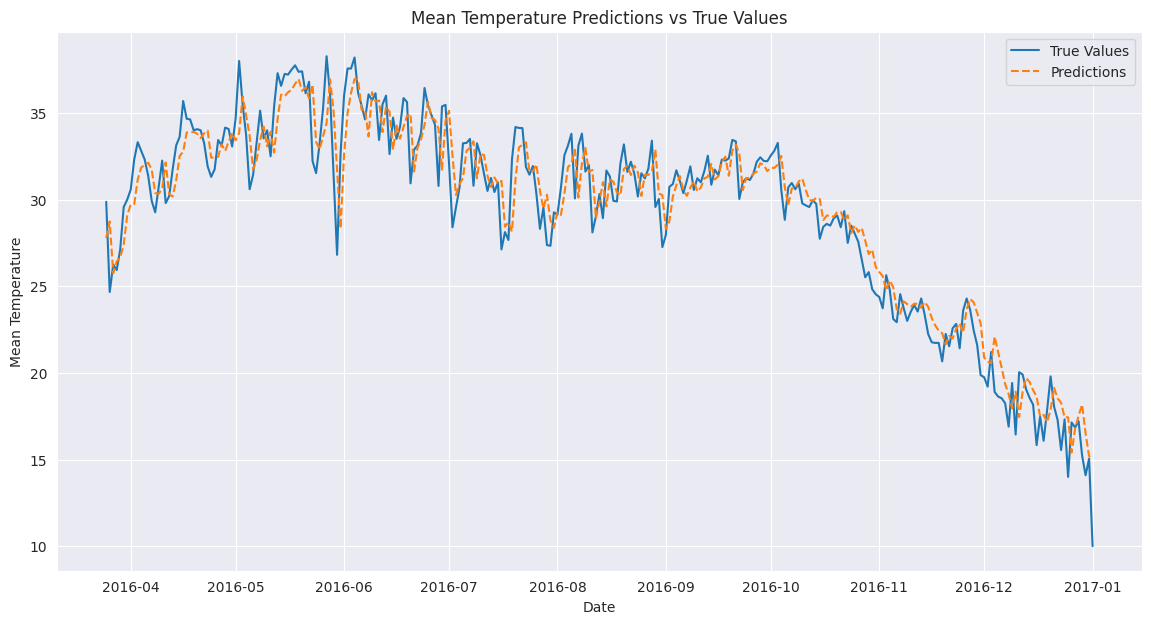

In [135]:
# Calculate RMSE and R2 scores
rmse = np.sqrt(mean_squared_error(y_test, gru_pred))
r2 = r2_score(y_test, gru_pred)

print(f'RMSE: {rmse}')
print(f'R2 Score: {r2}')

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(df.index[-len(y_test):], y_test, label='True Values')
plt.plot(df.index[-len(y_test):], lstm_pred, label='Predictions', linestyle='dashed')
plt.xlabel('Date')
plt.ylabel('Mean Temperature')
plt.title('Mean Temperature Predictions vs True Values')
plt.legend()
plt.show()

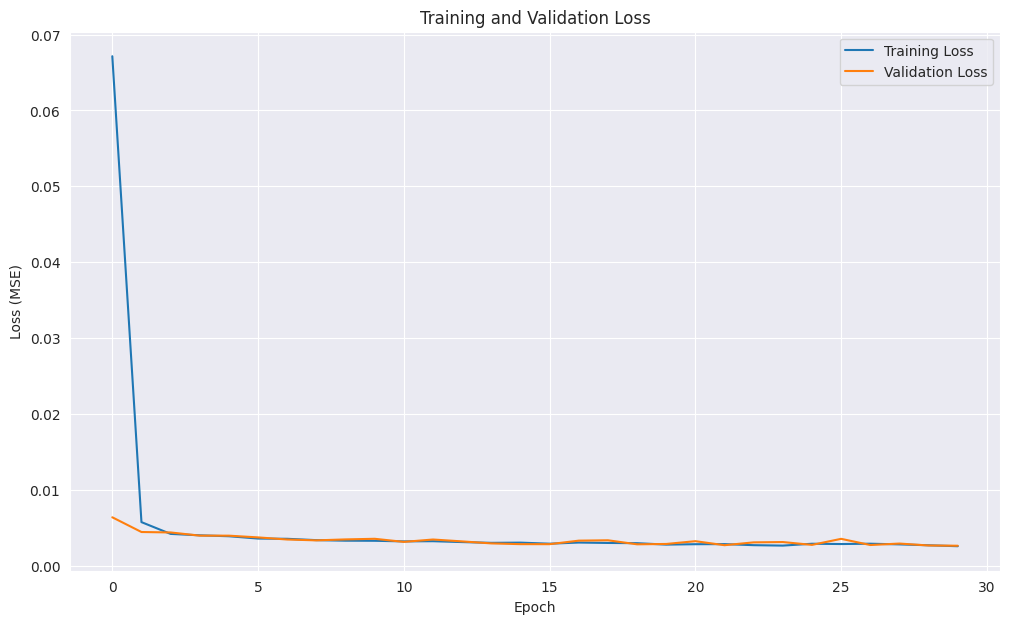

In [140]:
# Plotting training and validation loss
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

plt.figure(figsize=(12, 7))
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

> All three Deep Learning model has approximately the same performance

### Compare Models (For daily forecast)

In [141]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score

In [146]:
print(pred_df.head())

   Actual  Predicted
0  29.875     26.566
1  24.667     28.183
2  26.250     27.401
3  25.933     29.212
4  27.125     28.703


In [147]:
print(compare_df.head())

                MAPE  RMSE     R2
Prophet daily  0.050 1.659  0.914
ARIMA daily    0.245 8.100 -1.050
SARIMA daily   0.143 4.807  0.278
ARIMA Monthly  0.339 8.034 -0.077
SARIMA Monthly 0.080 1.942  0.937


In [148]:
# Calculate metrics for each model
def calculate_metrics(true_values, predicted_values):
    mape = mean_absolute_percentage_error(true_values, predicted_values)
    r2 = r2_score(true_values, predicted_values)
    rmse = math.sqrt(mean_squared_error(true_values, predicted_values))
    return mape, rmse, r2

# Metrics for each model
rnn_mape, rnn_rmse, rnn_r = calculate_metrics(y_test, rnn_pred)
lstm_mape, lstm_rmse, lstm_r = calculate_metrics(y_test, lstm_pred)
bilstm_mape, bilstm_rmse, bilstm_r = calculate_metrics(y_test, bilstm_pred)
gru_mape, gru_rmse, gru_r = calculate_metrics(y_test, gru_pred)

In [158]:
# Dataframe for deep learning models comparison
dl_compare = {
    'RNN daily': [rnn_mape, rnn_rmse, rnn_r],
    'LSTM daily': [lstm_mape, lstm_rmse, lstm_r],
    'BiLSTM daily': [bilstm_mape, bilstm_rmse, bilstm_r],
    'GRU daily': [gru_mape, gru_rmse, gru_r]
}
dl_compare_df = pd.DataFrame(dl_compare, index=['MAE', 'RMSE', 'R2'])

# Concatenate with existing compare_df
compare_models_df = pd.concat([compare_df, dl_compare_df], axis=1)
compare_models_df

MAPE  RMSE     R2  RNN daily  LSTM daily  BiLSTM daily  \
Prophet daily     0.050 1.659  0.914        NaN         NaN           NaN   
ARIMA daily       0.245 8.100 -1.050        NaN         NaN           NaN   
SARIMA daily      0.143 4.807  0.278        NaN         NaN           NaN   
ARIMA Monthly     0.339 8.034 -0.077        NaN         NaN           NaN   
SARIMA Monthly    0.080 1.942  0.937        NaN         NaN           NaN   
autoARIMA Monthly 0.096 2.250  0.915        NaN         NaN           NaN   
MAE                 NaN   NaN    NaN      0.173       0.047         0.053   
RMSE                NaN   NaN    NaN      5.586       1.650         1.834   
R2                  NaN   NaN    NaN      0.046       0.917         0.897   

                   GRU daily  
Prophet daily            NaN  
ARIMA daily              NaN  
SARIMA daily             NaN  
ARIMA Monthly            NaN  
SARIMA Monthly           NaN  
autoARIMA Monthly        NaN  
MAE                    0.048  
RMSE                   1.689  
R2                     0.913

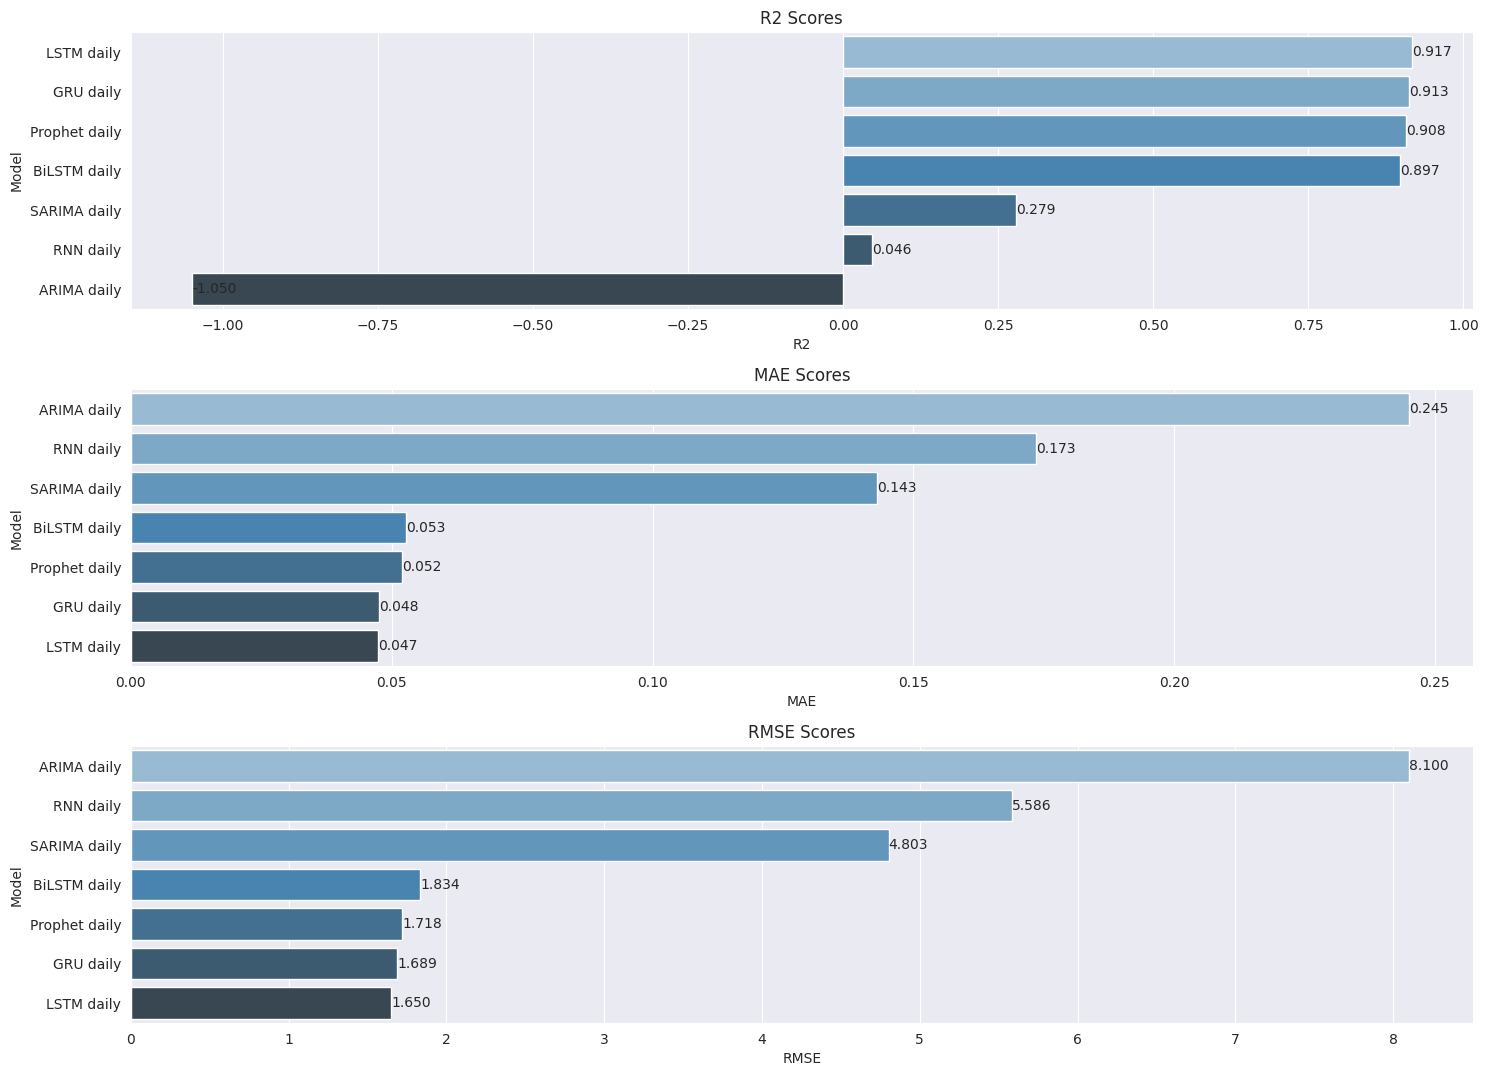

In [152]:
# Data for comparison plot
data = {
    'Model': ['Prophet daily', 'ARIMA daily', 'SARIMA daily', 'RNN daily', 'LSTM daily', 'BiLSTM daily', 'GRU daily'],
    'MAE': [0.052, 0.245, 0.143, rnn_mape, lstm_mape, bilstm_mape, gru_mape],
    'RMSE': [1.718, 8.100, 4.803, rnn_rmse, lstm_rmse, bilstm_rmse, gru_rmse],
    'R2': [0.908, -1.050, 0.279, rnn_r, lstm_r, bilstm_r, gru_r]
}
compare = pd.DataFrame(data)

# Function to add labels to the bar plots
def add_labels(ax):
    for p in ax.patches:
        width = p.get_width()
        ax.text(width, p.get_y() + p.get_height() / 2, '{:.3f}'.format(width), ha='left', va='center')

# Plotting
plt.figure(figsize=(15, 14))

plt.subplot(411)
compare_sorted = compare.sort_values(by="R2", ascending=False)
ax = sns.barplot(x="R2", y="Model", data=compare_sorted, palette="Blues_d")
add_labels(ax)
plt.title('R2 Scores')

plt.subplot(412)
compare_sorted = compare.sort_values(by="MAE", ascending=False)
ax = sns.barplot(x="MAE", y="Model", data=compare_sorted, palette="Blues_d")
add_labels(ax)
plt.title('MAE Scores')

plt.subplot(413)
compare_sorted = compare.sort_values(by="RMSE", ascending=False)
ax = sns.barplot(x="RMSE", y="Model", data=compare_sorted, palette="Blues_d")
add_labels(ax)
plt.title('RMSE Scores')

plt.tight_layout()
plt.show()


## Conclusion

After exploring various time series models in detail and leveraging advanced visualizations, I've concluded that **Prophet** is my preferred choice among the other models. Despite testing over 6 models in a multivariate time series, Prophet's simplicity, performance, and cost-effectiveness make it the standout solution.